In [7]:
import pandas as pd
df_trainm = pd.read_csv(r"C:\Users\Desktop\dataset\events.csv")
df_trainm['type'].value_counts()
# df_trainm.head()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [6]:
df_trainm['date'] = pd.to_datetime(df_trainm['date'])
df_trainm['month'] = df_trainm['date'].dt.month
df_trainm.head()

Unnamed: 0  id       date  store_nbr      family  sales  onpromotion  \
0           0   0 2013-01-01          1  AUTOMOTIVE    0.0            0   
1           1   1 2013-01-01          1   BABY CARE    0.0            0   
2           2   2 2013-01-01          1      BEAUTY    0.0            0   
3           3   3 2013-01-01          1   BEVERAGES    0.0            0   
4           4   4 2013-01-01          1       BOOKS    0.0            0   

   transactions   city      state store_type  cluster  dcoilwtico holid_type  \
0           0.0  Quito  Pichincha          D       13       93.14    Holiday   
1           0.0  Quito  Pichincha          D       13       93.14    Holiday   
2           0.0  Quito  Pichincha          D       13       93.14    Holiday   
3           0.0  Quito  Pichincha          D       13       93.14    Holiday   
4           0.0  Quito  Pichincha          D       13       93.14    Holiday   

     locale locale_name         description  transferred  year  month  
0  National     Ecuador  Primer dia del ano        False  2013      1  
1  National     Ecuador  Primer dia del ano        False  2013      1  
2  National     Ecuador  Primer dia del ano        False  2013      1  
3  National     Ecuador  Primer dia del ano        False  2013      1  
4  National     Ecuador  Primer dia del ano        False  2013      1

In [7]:
df_trainm['date'] = pd.to_datetime(df_trainm['date'])
df_trainm['day_of_week'] = df_trainm['date'].dt.day_name()
df_trainm.tail()

Unnamed: 0       id       date  store_nbr  \
3054343     3054343  3000883 2017-08-15          9   
3054344     3054344  3000884 2017-08-15          9   
3054345     3054345  3000885 2017-08-15          9   
3054346     3054346  3000886 2017-08-15          9   
3054347     3054347  3000887 2017-08-15          9   

                             family     sales  onpromotion  transactions  \
3054343                     POULTRY   438.133            0        2155.0   
3054344              PREPARED FOODS   154.553            1        2155.0   
3054345                     PRODUCE  2419.729          148        2155.0   
3054346  SCHOOL AND OFFICE SUPPLIES   121.000            8        2155.0   
3054347                     SEAFOOD    16.000            0        2155.0   

          city      state  ... cluster  dcoilwtico  holid_type locale  \
3054343  Quito  Pichincha  ...       6       47.57     Holiday  Local   
3054344  Quito  Pichincha  ...       6       47.57     Holiday  Local   
3054345  Quito  Pichincha  ...       6       47.57     Holiday  Local   
3054346  Quito  Pichincha  ...       6       47.57     Holiday  Local   
3054347  Quito  Pichincha  ...       6       47.57     Holiday  Local   

        locale_name            description transferred  year  month  \
3054343    Riobamba  Fundacion de Riobamba       False  2017      8   
3054344    Riobamba  Fundacion de Riobamba       False  2017      8   
3054345    Riobamba  Fundacion de Riobamba       False  2017      8   
3054346    Riobamba  Fundacion de Riobamba       False  2017      8   
3054347    Riobamba  Fundacion de Riobamba       False  2017      8   

         day_of_week  
3054343      Tuesday  
3054344      Tuesday  
3054345      Tuesday  
3054346      Tuesday  
3054347      Tuesday  

[5 rows x 21 columns]

In [9]:
# monthly sales per year
df_2013 = df_trainm[df_trainm['year']==2013][['month','sales']]
df_2013 = df_2013.groupby('month').agg({"sales" : "mean"}).reset_index().rename(columns={'sales':'s13'})
df_2014 = df_trainm[df_trainm['year']==2014][['month','sales']]
df_2014 = df_2014.groupby('month').agg({"sales" : "mean"}).reset_index().rename(columns={'sales':'s14'})
df_2015 = df_trainm[df_trainm['year']==2015][['month','sales']]
df_2015 = df_2015.groupby('month').agg({"sales" : "mean"}).reset_index().rename(columns={'sales':'s15'})
df_2016 = df_trainm[df_trainm['year']==2016][['month','sales']]
df_2016 = df_2016.groupby('month').agg({"sales" : "mean"}).reset_index().rename(columns={'sales':'s16'})
df_2017 = df_trainm[df_trainm['year']==2017][['month','sales']]
df_2017 = df_2017.groupby('month').agg({"sales" : "mean"}).reset_index()
df_2017_no = pd.DataFrame({'month': [9,10,11,12], 'sales':[0,0,0,0]})
df_2017 = df_2017.append(df_2017_no).rename(columns={'sales':'s17'})
df_year = df_2013.merge(df_2014,on='month').merge(df_2015,on='month').merge(df_2016,on='month').merge(df_2017,on='month')

# top levels
top_labels = ['2013', '2014', '2015', '2016', '2017']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

# X axis value 
df_year = df_year[['s13','s14','s15','s16','s17']].replace(np.nan,0)
x_data = df_year.values

# y axis value (Month)
df_2013['month'] =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_data = df_2013['month'].tolist()

fig = go.Figure()
for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(title='Avg Sales for each Year',
    xaxis=dict(showgrid=False, 
               zeroline=False, domain=[0.15, 1]),
    yaxis=dict(showgrid=False, showline=False,
               showticklabels=False, zeroline=False),
    barmode='stack', 
    template="plotly_white",
    margin=dict(l=0, r=50, t=100, b=10),
    showlegend=False, 
)

annotations = []
for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                          showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]
fig.update_layout(
    annotations=annotations)
fig.show()

C:\Users\Arin\AppData\Local\Temp\ipykernel_16572\2858412891.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



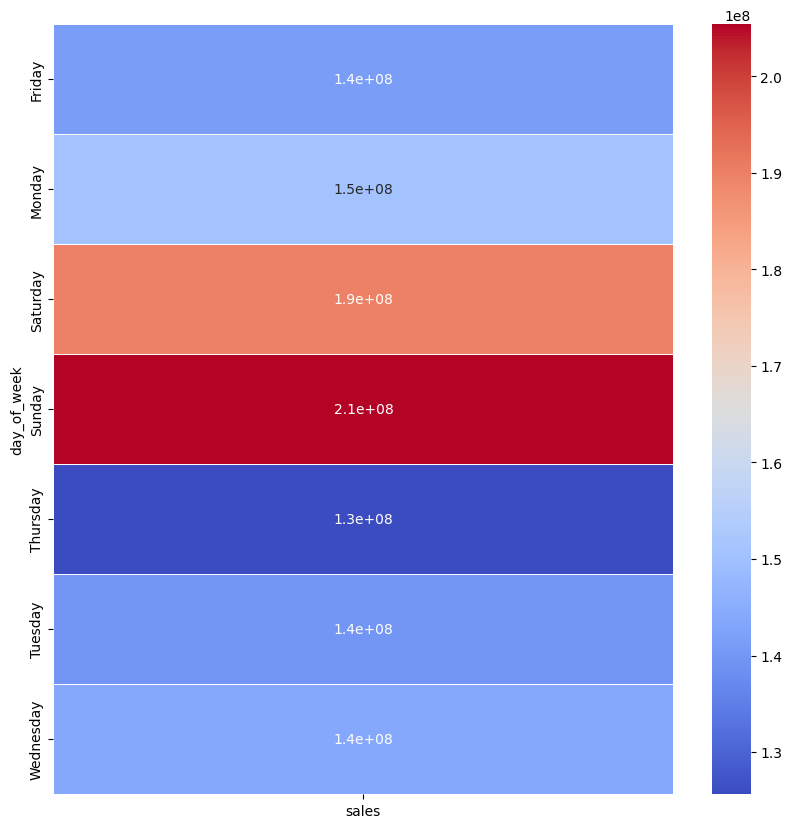

In [26]:
#total sales distribution within a week
table=pd.pivot_table(df_trainm, values ='sales', index =['day_of_week'], aggfunc = np.sum)
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(table, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")
plt.show()

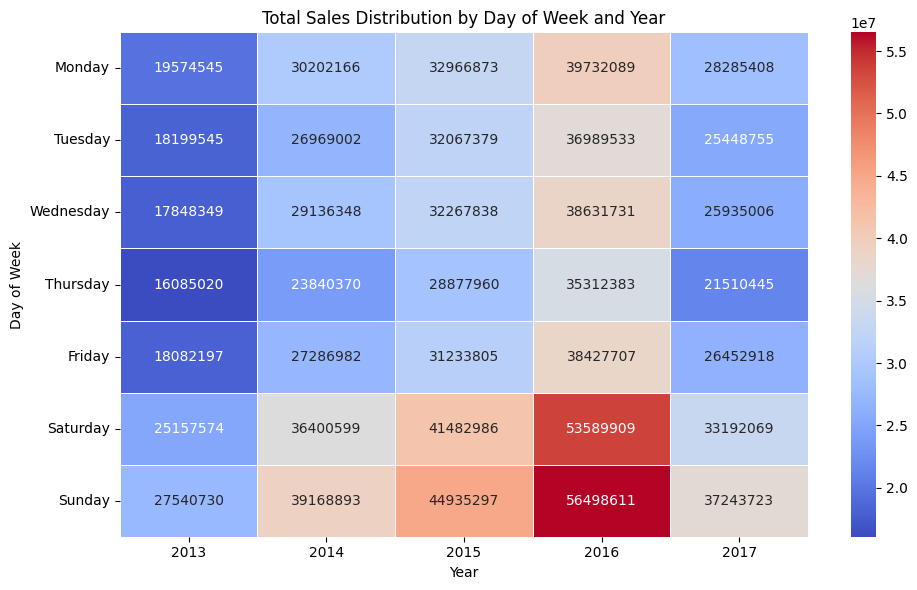

In [43]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_trainm['day_of_week'] = pd.Categorical(df_trainm['day_of_week'], categories=day_order, ordered=True)

# Pivot table: total sales by day of week and year
weekly_sales_pivot = pd.pivot_table(
    df_trainm,
    values='sales',
    index='day_of_week',
    columns='year',
    aggfunc=np.sum
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weekly_sales_pivot, annot=True, fmt=".0f", linewidths=0.5, cmap="coolwarm")
plt.title("Total Sales Distribution by Day of Week and Year")
plt.ylabel("Day of Week")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


In [30]:
df_trainm['date'] = pd.to_datetime(df_trainm['date'])
df_trainm['quarter'] = df_trainm['date'].dt.quarter

In [42]:
df_trainm[['year', 'quarter']].value_counts()

year  quarter
2016  2          174636
2017  2          167508
2014  2          167508
2013  2          167508
2016  3          167508
2015  2          165726
2016  4          165726
2013  3          165726
2014  3          165726
      4          165726
2015  3          165726
2013  4          163944
2015  4          163944
2016  1          162162
2017  1          160380
2013  1          160380
2015  1          160380
2014  1          160380
2017  3           83754
dtype: int64

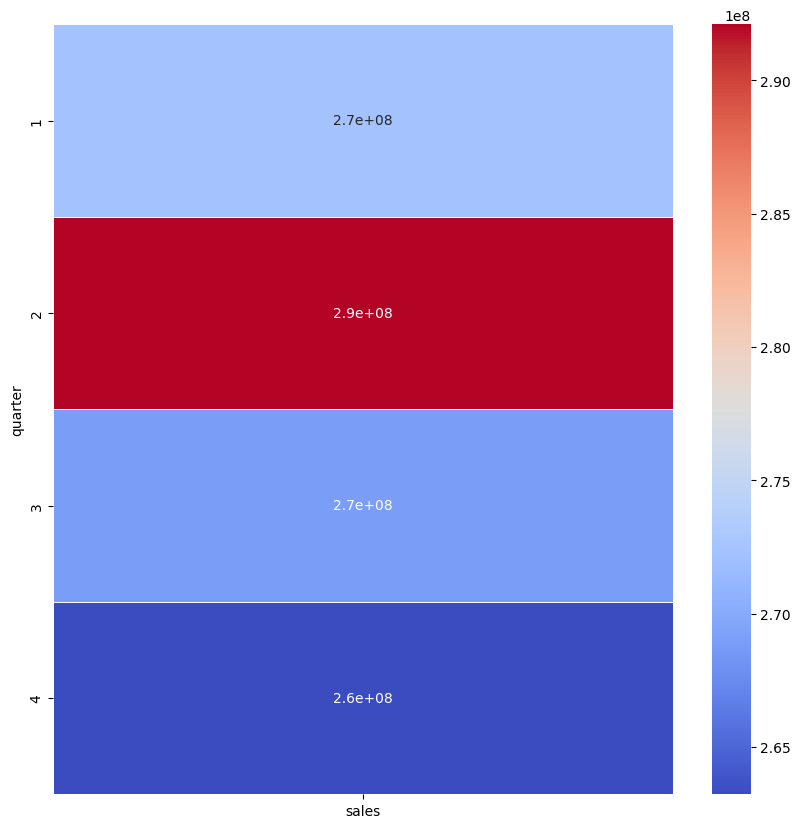

In [37]:
#total sales distribution in four quarters
table=pd.pivot_table(df_trainm, values ='sales', index =['quarter'], aggfunc = np.sum)
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(table, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")
plt.show()

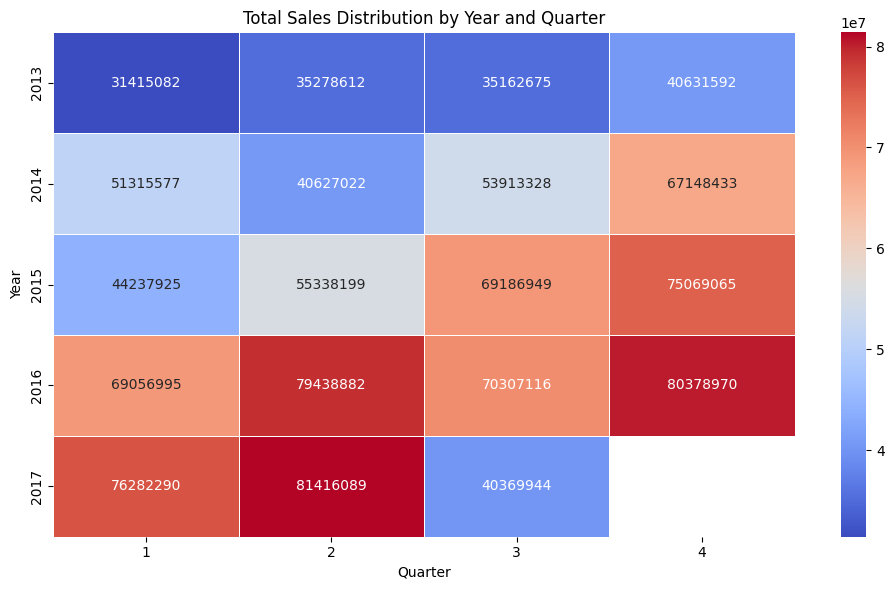

In [39]:
sales_pivot = pd.pivot_table(
    df_trainm,
    values='sales',
    index='year',
    columns='quarter',
    aggfunc=np.sum
)
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, annot=True, fmt=".0f", linewidths=0.5, cmap="coolwarm")
plt.title("Total Sales Distribution by Year and Quarter")
plt.ylabel("Year")
plt.xlabel("Quarter")
plt.tight_layout()
plt.show()

In [46]:
day_week = {
    'Monday':'Weekday',
    'Tuesday':'Weekday',
    'Wednesday':'Weekday',
    'Thursday':'Weekday',
    'Friday':'Weekday',
    'Saturday':'Weekend',
    'Sunday':'Weekend'
}

df_trainm['day_in_week']=df_trainm['day_of_week'].map(day_week)
df_trainm.head()

Unnamed: 0  id       date  store_nbr      family  sales  onpromotion  \
0           0   0 2013-01-01          1  AUTOMOTIVE    0.0            0   
1           1   1 2013-01-01          1   BABY CARE    0.0            0   
2           2   2 2013-01-01          1      BEAUTY    0.0            0   
3           3   3 2013-01-01          1   BEVERAGES    0.0            0   
4           4   4 2013-01-01          1       BOOKS    0.0            0   

   transactions   city      state  ... holid_type    locale  locale_name  \
0           0.0  Quito  Pichincha  ...    Holiday  National      Ecuador   
1           0.0  Quito  Pichincha  ...    Holiday  National      Ecuador   
2           0.0  Quito  Pichincha  ...    Holiday  National      Ecuador   
3           0.0  Quito  Pichincha  ...    Holiday  National      Ecuador   
4           0.0  Quito  Pichincha  ...    Holiday  National      Ecuador   

          description transferred  year month  day_of_week  quarter  \
0  Primer dia del ano       False  2013     1      Tuesday        1   
1  Primer dia del ano       False  2013     1      Tuesday        1   
2  Primer dia del ano       False  2013     1      Tuesday        1   
3  Primer dia del ano       False  2013     1      Tuesday        1   
4  Primer dia del ano       False  2013     1      Tuesday        1   

   day_in_week  
0      Weekday  
1      Weekday  
2      Weekday  
3      Weekday  
4      Weekday  

[5 rows x 23 columns]

In [47]:
fa_sa = df_trainm.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)

new_fam1={}
keys=fa_sa[fa_sa['sales']>85]['family'].to_numpy()
for i in range(len(keys)):
    new_fam1[keys[i]] = 'Popular Genre'

new_fam2={}
key=fa_sa[fa_sa['sales']<85]['family'].to_numpy()
for i in range(len(key)):
    new_fam2[key[i]] = 'Unpopular Genre'

new_fam = {}
new_fam.update(new_fam1)
new_fam.update(new_fam2)

df_trainm['new_family']=df_trainm['family'].map(new_fam)
df_trainm.head()

Unnamed: 0  id       date  store_nbr      family  sales  onpromotion  \
0           0   0 2013-01-01          1  AUTOMOTIVE    0.0            0   
1           1   1 2013-01-01          1   BABY CARE    0.0            0   
2           2   2 2013-01-01          1      BEAUTY    0.0            0   
3           3   3 2013-01-01          1   BEVERAGES    0.0            0   
4           4   4 2013-01-01          1       BOOKS    0.0            0   

   transactions   city      state  ...    locale  locale_name  \
0           0.0  Quito  Pichincha  ...  National      Ecuador   
1           0.0  Quito  Pichincha  ...  National      Ecuador   
2           0.0  Quito  Pichincha  ...  National      Ecuador   
3           0.0  Quito  Pichincha  ...  National      Ecuador   
4           0.0  Quito  Pichincha  ...  National      Ecuador   

          description transferred  year month day_of_week  quarter  \
0  Primer dia del ano       False  2013     1     Tuesday        1   
1  Primer dia del ano       False  2013     1     Tuesday        1   
2  Primer dia del ano       False  2013     1     Tuesday        1   
3  Primer dia del ano       False  2013     1     Tuesday        1   
4  Primer dia del ano       False  2013     1     Tuesday        1   

   day_in_week       new_family  
0      Weekday  Unpopular Genre  
1      Weekday  Unpopular Genre  
2      Weekday  Unpopular Genre  
3      Weekday    Popular Genre  
4      Weekday  Unpopular Genre  

[5 rows x 24 columns]

<Axes: xlabel='family', ylabel='sales'>

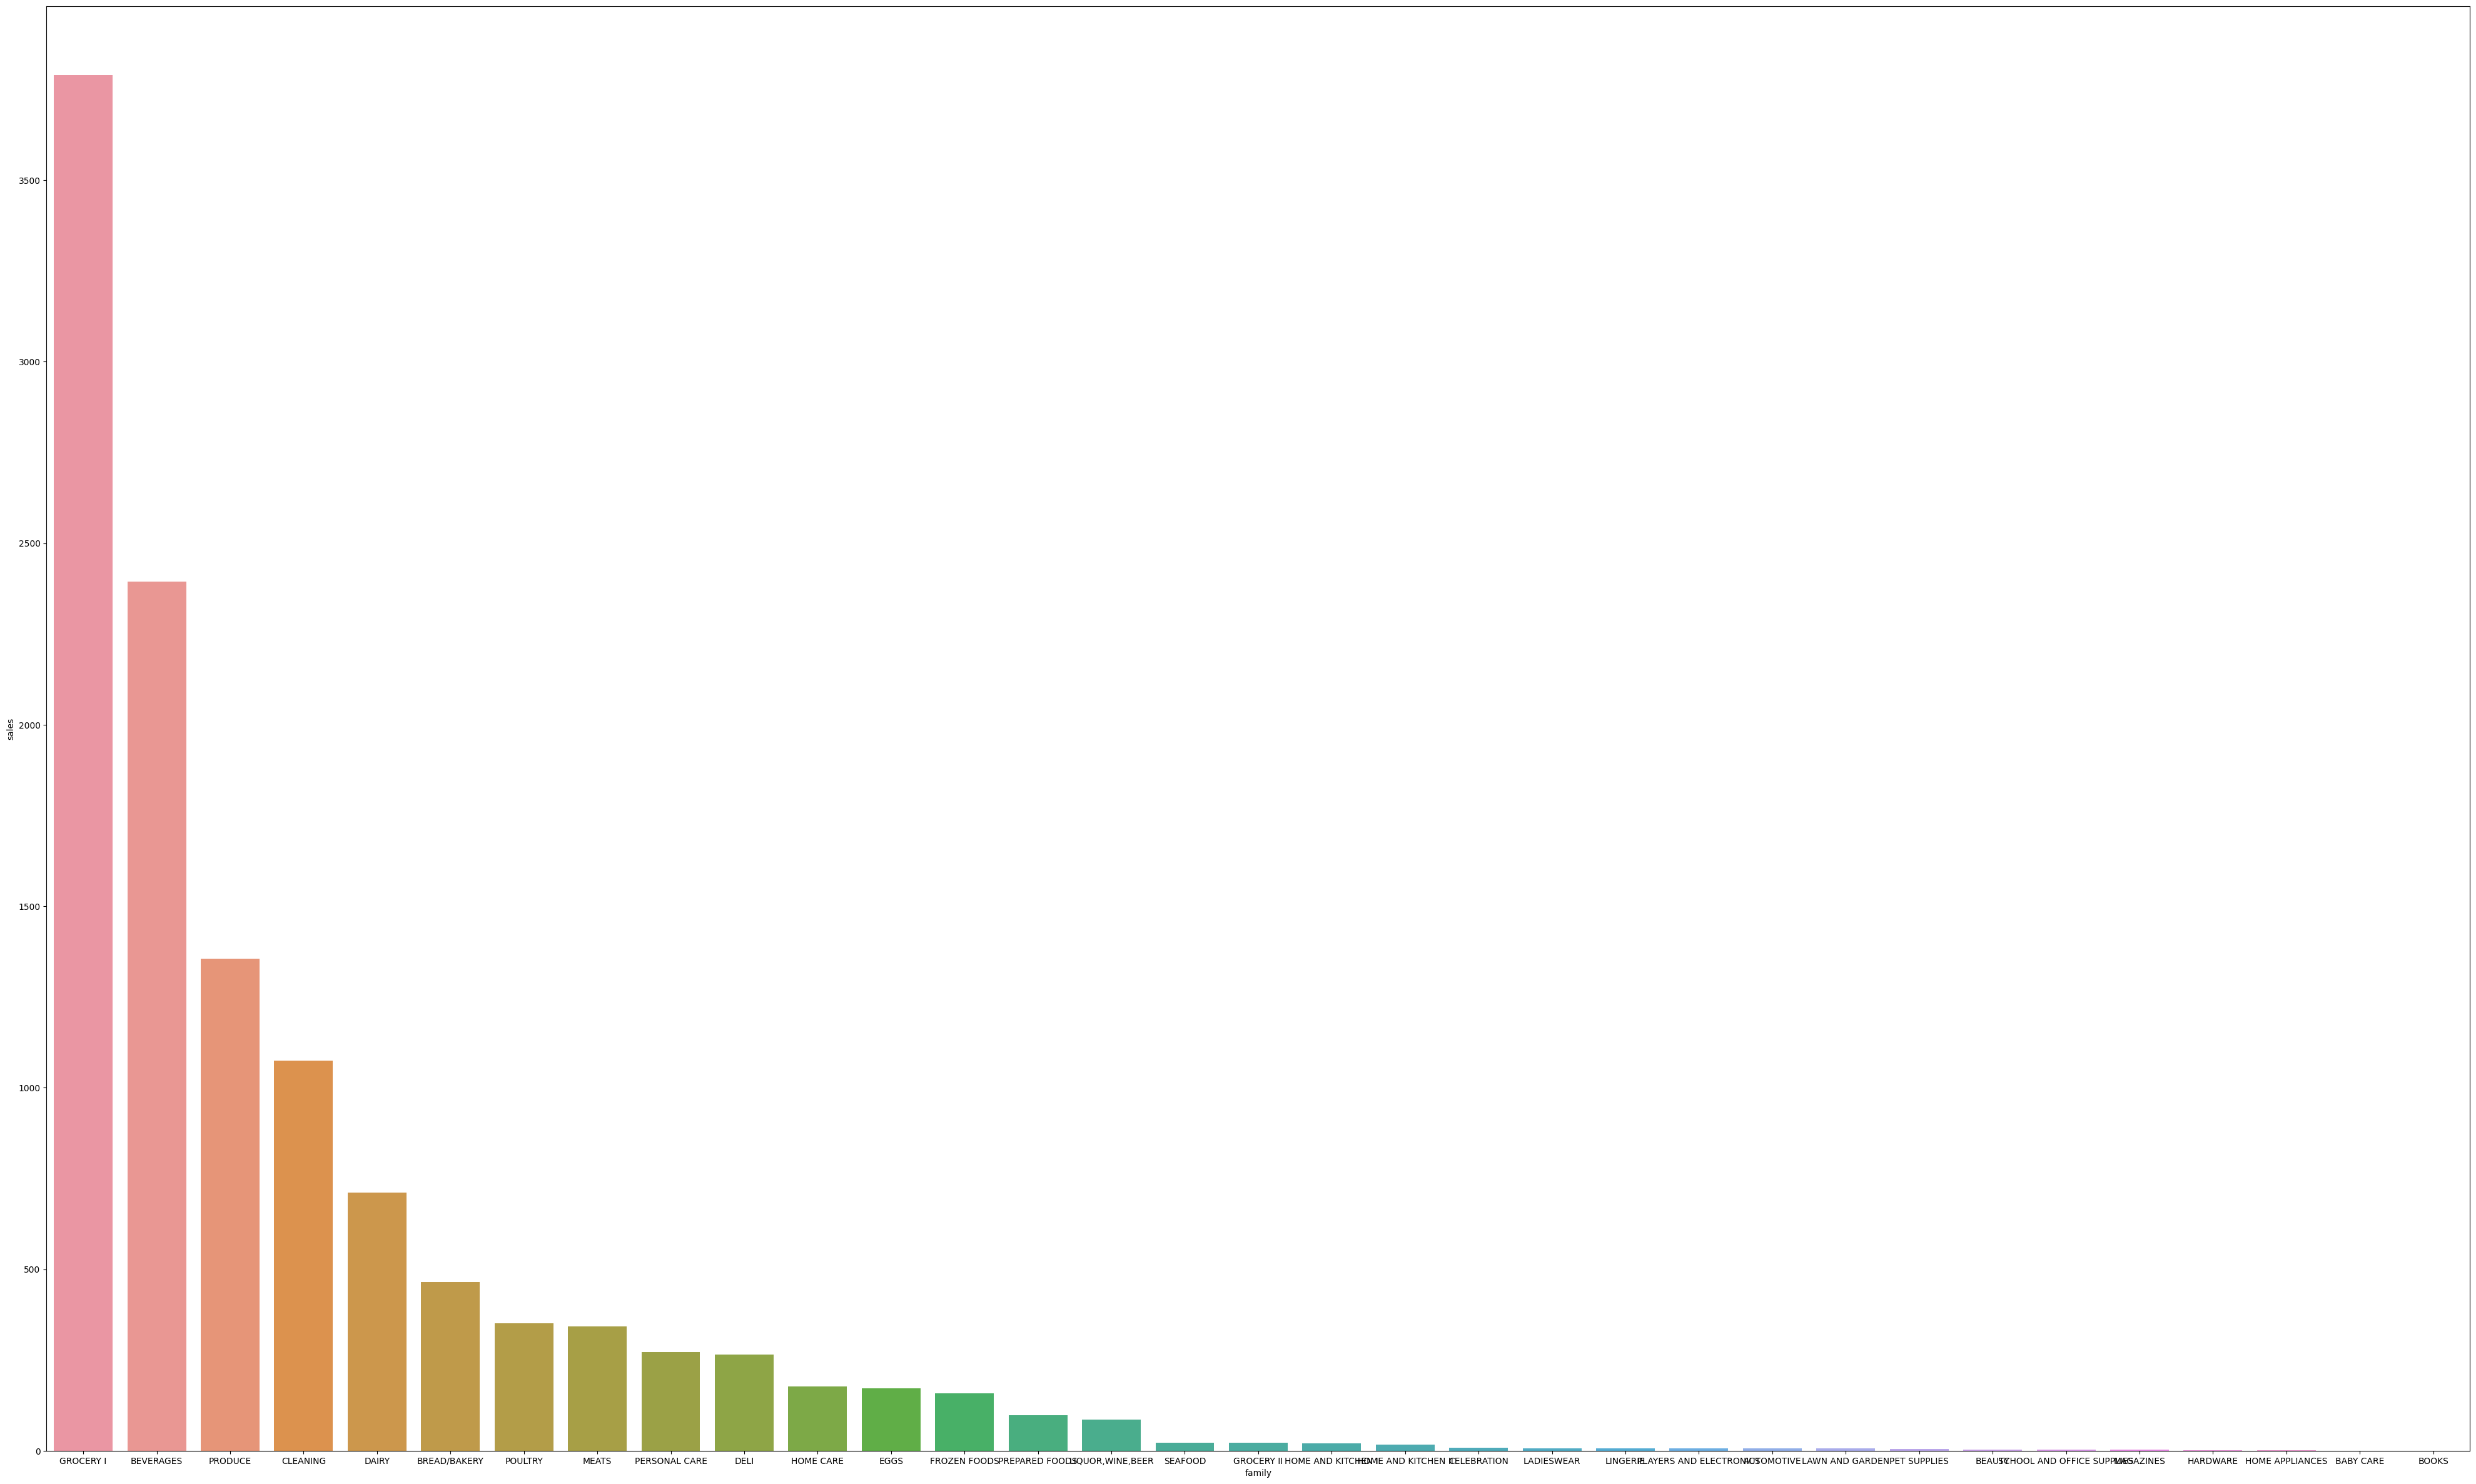

In [48]:
plt.figure(figsize=(50,30))
sns.barplot(data=fa_sa,x='family',y='sales')

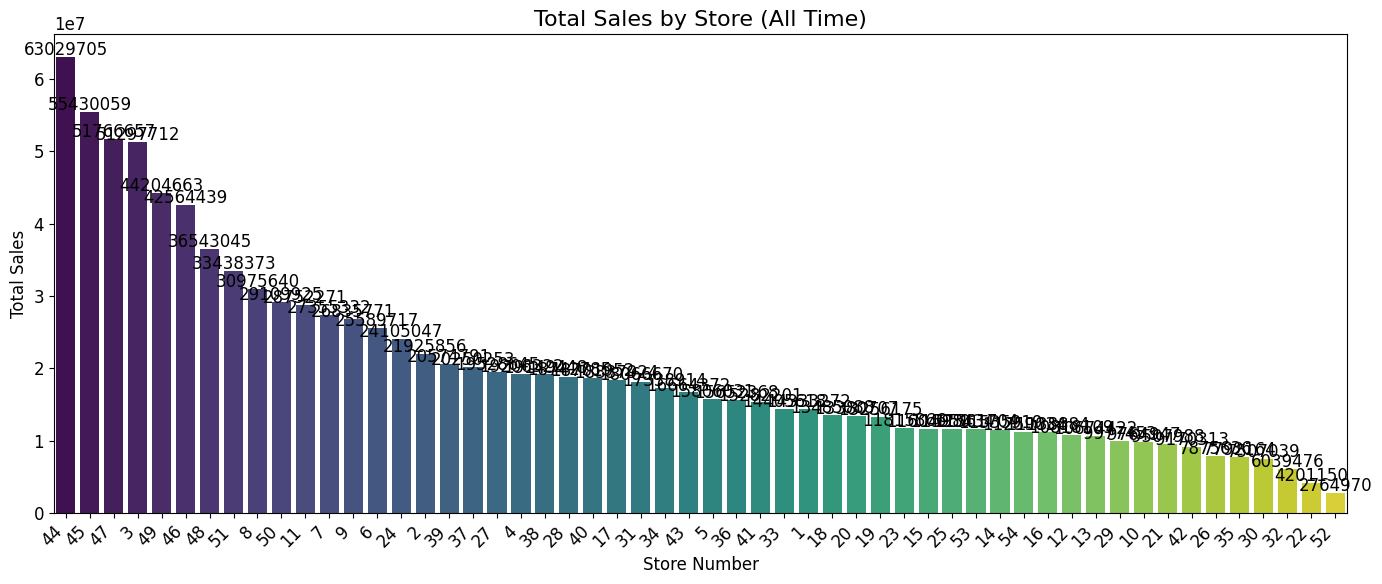

In [55]:
store_sales = data.groupby('store_nbr')['sales'].sum().reset_index()
store_sales = store_sales.sort_values('sales', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(
    data=store_sales, 
    x='store_nbr', 
    y='sales', 
    palette='viridis',
    order=store_sales['store_nbr']
)

# Add data labels
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{p.get_height():.0f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

# Formatting
plt.title("Total Sales by Store (All Time)", fontsize=16)
plt.xlabel("Store Number", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

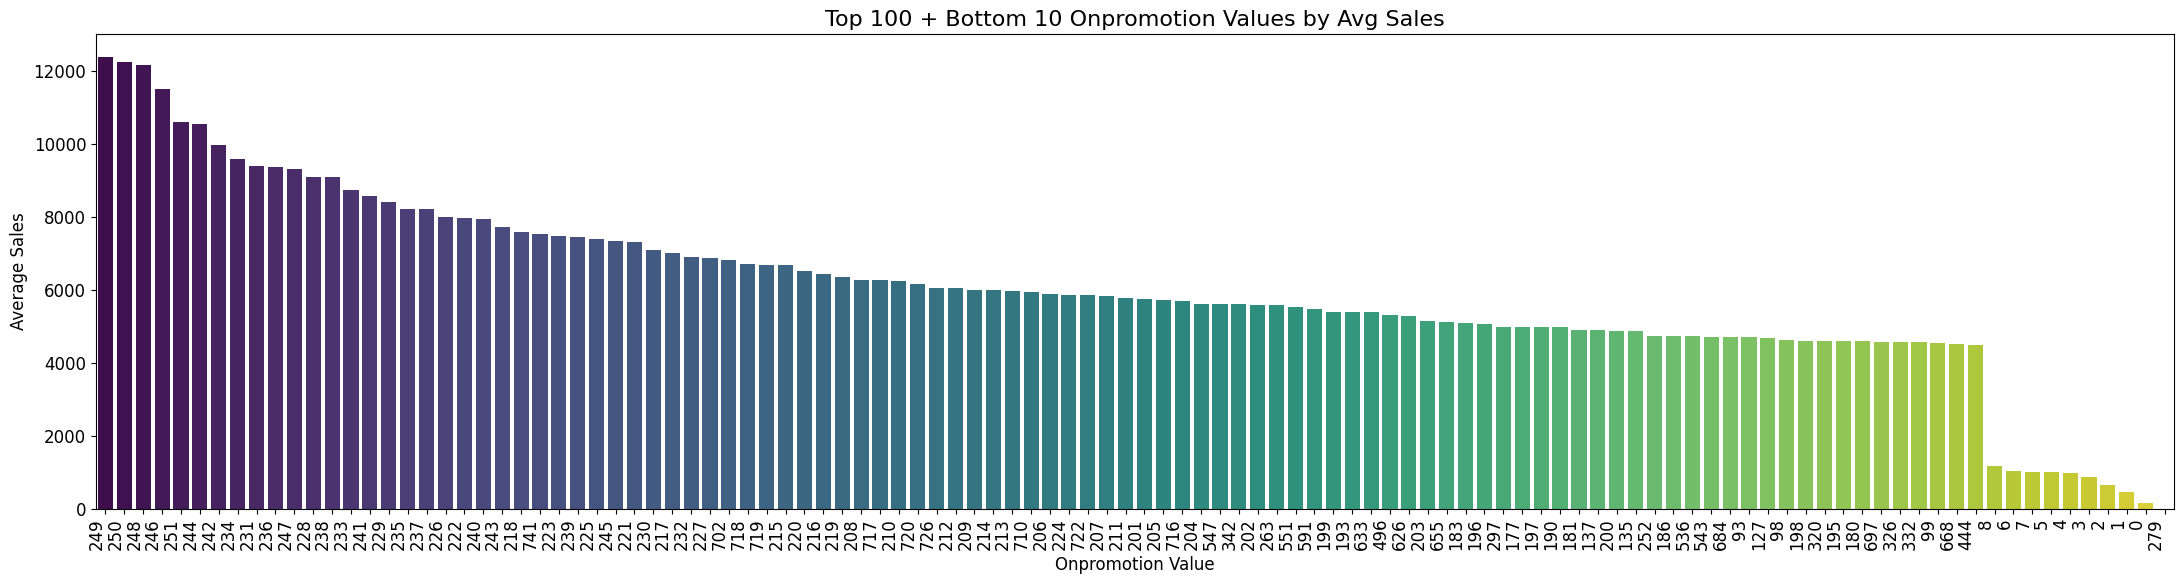

In [56]:
promotion_sales = data.groupby('onpromotion')['sales'].mean().reset_index()

top_100 = promotion_sales.sort_values('sales', ascending=False).head(100)
bottom_10 = promotion_sales.sort_values('sales', ascending=True).head(10)

combined = pd.concat([top_100, bottom_10], ignore_index=True)
combined = combined.sort_values('sales', ascending=False)

plt.figure(figsize=(22, 6))
bar_plot = sns.barplot(
    data=combined,
    x='onpromotion',
    y='sales',
    palette='viridis',
    order=combined['onpromotion']
)

plt.title("Top 100 + Bottom 10 Onpromotion Values by Avg Sales", fontsize=16)
plt.xlabel("Onpromotion Value", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [58]:
data['sales'].corr(data['onpromotion'])

0.42878345378355354

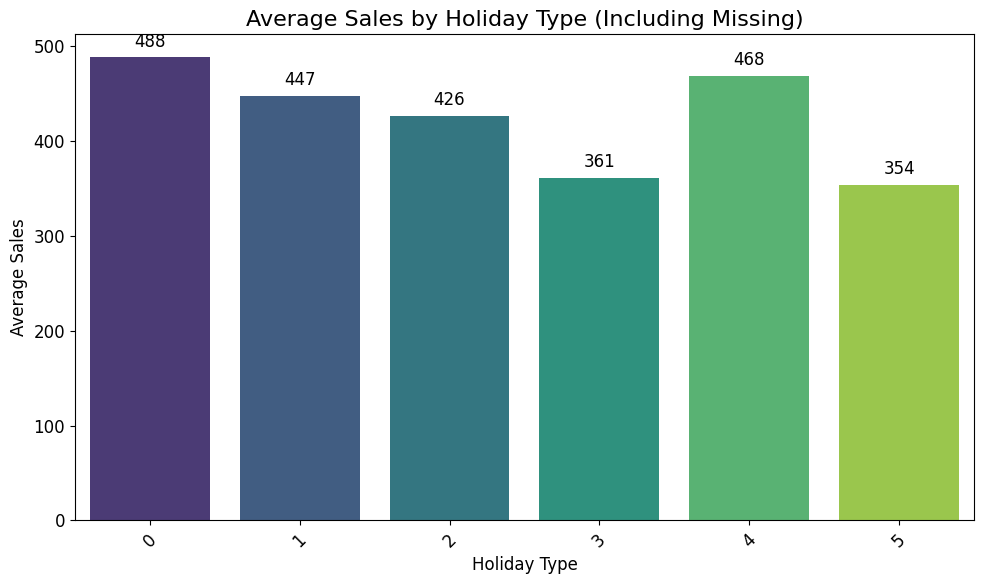

In [62]:
holiday_sales = data.groupby('holid_type')['sales'].mean().reset_index()
holiday_sales = holiday_sales.sort_values('sales', ascending=False)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=holiday_sales,
    x='holid_type',
    y='sales',
    palette='viridis'
)

# Data labels
for p in bar_plot.patches:
    bar_plot.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        xytext=(0, 5), textcoords='offset points'
    )

plt.title("Average Sales by Holiday Type (Including Missing)", fontsize=16)
plt.xlabel("Holiday Type", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

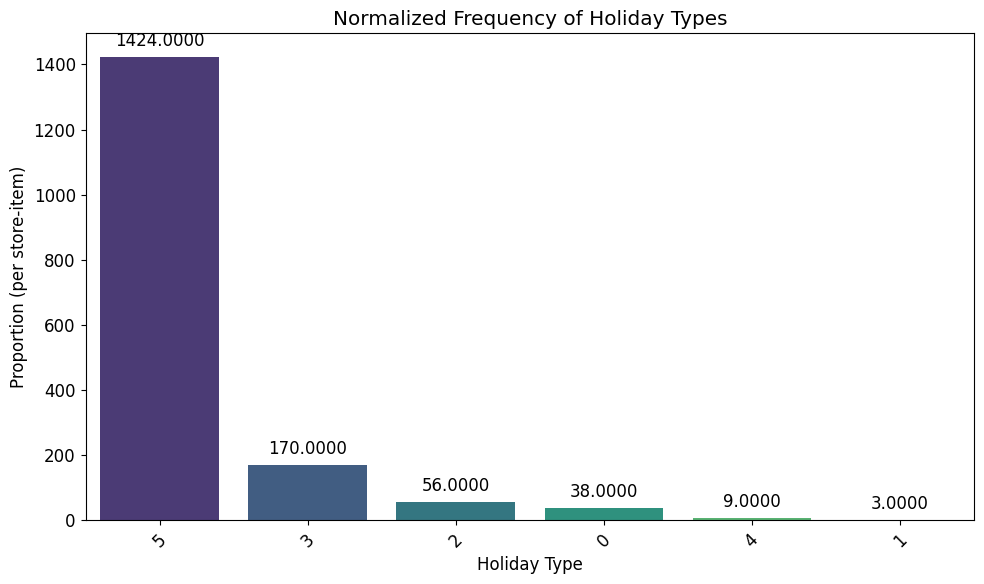

In [63]:
holiday_counts = (data['holid_type'].value_counts(dropna=False) / (33 * 54)).reset_index()
holiday_counts.columns = ['holid_type', 'proportion']

holiday_counts['holid_type'] = holiday_counts['holid_type'].astype(str)

plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_counts, x='holid_type', y='proportion', palette='viridis')

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():.4f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        xytext=(0, 5), textcoords='offset points'
    )

plt.title("Normalized Frequency of Holiday Types")
plt.xlabel("Holiday Type")
plt.ylabel("Proportion (per store-item)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
df_trainm['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

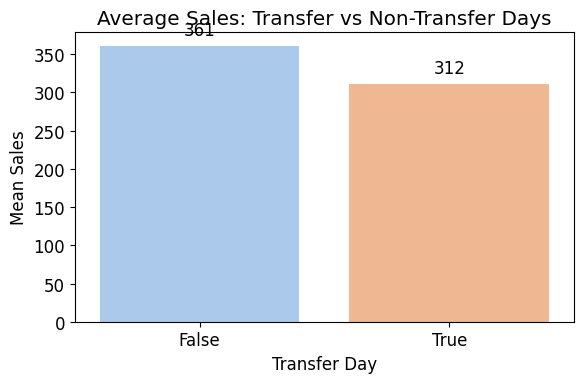

In [64]:
transfer_sales = data.groupby('transferred')['sales'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=transfer_sales, x='transferred', y='sales', palette='pastel')

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        xytext=(0, 5), textcoords='offset points'
    )

plt.title("Average Sales: Transfer vs Non-Transfer Days")
plt.xlabel("Transfer Day")
plt.ylabel("Mean Sales")
plt.tight_layout()
plt.show()

## Store analysis

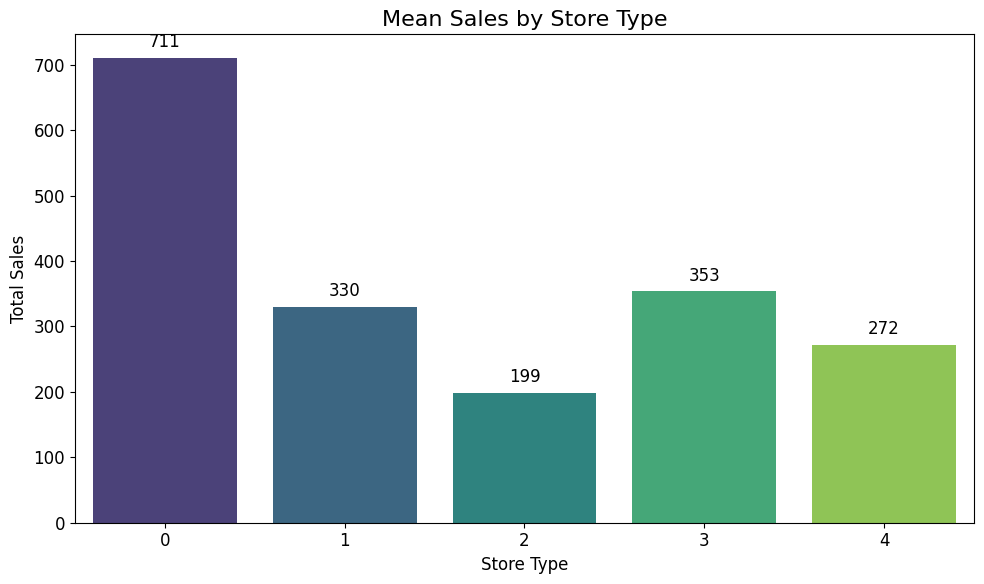

In [68]:
type_sales = data.groupby('store_type')['sales'].mean().reset_index()

type_sales = type_sales.sort_values('sales', ascending=False)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=type_sales,
    x='store_type',
    y='sales',
    palette='viridis'
)

for p in bar_plot.patches:
    bar_plot.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        xytext=(0, 5), textcoords='offset points'
    )

plt.title("Mean Sales by Store Type", fontsize=16)
plt.xlabel("Store Type", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.tight_layout()
plt.show()

In [70]:
mapping = {
    'D': 3.3059,
    'B': 2.8594,
    'C': 0.4568,
    'E': 1.7923,
    'A': 9.8458
}

data['store_type_numeric'] = data['store_type'].map(mapping)
data.drop('store_type',axis=1,inplace=True)

In [73]:
df = data.rename(columns={
    'city': 'stores_city',
    'state': 'stores_state',
    'type': 'stores_type',
    'cluster': 'stores_cluster'
})
df.head()

Unnamed: 0  store_nbr  family   sales  onpromotion  transactions  \
0       24948          1       0     1.0            0        1680.0   
1       24949          1       1     0.0            0        1680.0   
2       24950          1       2     0.0            0        1680.0   
3       24951          1       3  1149.0            0        1680.0   
4       24952          1       4     0.0            0        1680.0   

   stores_city  stores_state  stores_cluster  dcoilwtico  ...  description  \
0           18            12              13       93.26  ...           99   
1           18            12              13       93.26  ...           99   
2           18            12              13       93.26  ...           99   
3           18            12              13       93.26  ...           99   
4           18            12              13       93.26  ...           99   

   transferred  year  month  day_of_week   lag_1  roll_mean_7  roll_std_7  \
0        False  2013      1            1     2.0     2.142857    0.377964   
1        False  2013      1            1     0.0     0.000000    0.000000   
2        False  2013      1            1     2.0     1.571429    1.272418   
3        False  2013      1            1  1178.0   998.285714  221.822537   
4        False  2013      1            1     0.0     0.000000    0.000000   

   is_holiday  store_type_numeric  
0           1                 NaN  
1           1                 NaN  
2           1                 NaN  
3           1                 NaN  
4           1                 NaN  

[5 rows x 23 columns]

In [75]:
df['stores_cluster'].value_counts()/33/54

3     220.370370
10    188.888889
6     188.888889
15    157.407407
13    125.925926
14    125.925926
11     94.444444
4      94.444444
8      94.444444
1      94.444444
9      62.962963
2      62.962963
7      62.962963
16     31.481481
5      31.481481
12     31.481481
17     31.481481
Name: stores_cluster, dtype: float64

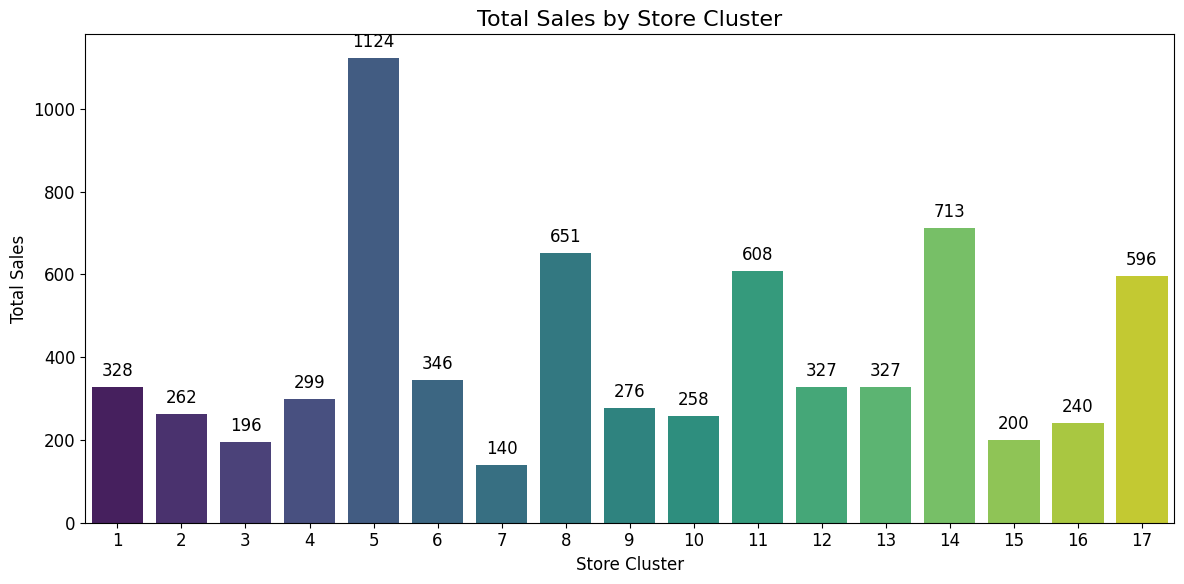

In [76]:
cluster_sales = df.groupby('stores_cluster')['sales'].mean().reset_index()
cluster_sales = cluster_sales.sort_values('sales', ascending=False)

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=cluster_sales,
    x='stores_cluster',
    y='sales',
    palette='viridis'
)

for p in bar_plot.patches:
    bar_plot.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.title("Total Sales by Store Cluster", fontsize=16)
plt.xlabel("Store Cluster", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.tight_layout()
plt.show()

In [91]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(x=X[freq], 
                      y=X[y],
                      ax=ax, 
                      hue=X[period],
                      palette=palette, 
                      legend=False)
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(name, 
                    xy=(1, y_), 
                    xytext=(6, 0), 
                    color=line.get_color(), 
                    xycoords=ax.get_yaxis_transform(), 
                    textcoords="offset points", 
                    size=14, 
                    va="center")
    return ax

In [92]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(ts, fs=fs, detrend=detrend, window="boxcar", scaling='spectrum')
    if ax is None:x
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(["Annual (1)", "Semiannual (2)", "Quarterly (4)", 
                        "Bimonthly (6)", "Monthly (12)", "Biweekly (26)", 
                        "Weekly (52)", "Semiweekly (104)"], rotation=30)
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

In [ ]:
def seasonality(df, key, freq, col):
    df_grouped = grouped(df, key, freq, col)
    df_grouped['date'] = pd.to_datetime(df_grouped['date'], format = "%Y-%m-%d")
    df_grouped.index = df_grouped['date'] 
    df_grouped = df_grouped.drop(columns=['date'])
    df_grouped.index.freq = freq # manually set the frequency of the index
    
    X = df_grouped.copy()
    X.index = pd.to_datetime(X.index, format = "%Y-%m-%d") 
    X.index.freq = freq 
    # days within a week
    X["day"] = X.index.dayofweek   # the x-axis (freq)
    X["week"] = pd.Int64Index(X.index.isocalendar().week)  # the seasonal period (period)
    # days within a year
    X["dayofyear"] = X.index.dayofyear
    X["year"] = X.index.year
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 30))
    seasonal_plot(X, y='mean', period="week", freq="day", ax=ax0)
    seasonal_plot(X, y='mean', period="year", freq="dayofyear", ax=ax1)
    X_new = (X['mean'].copy()).dropna()
    plot_periodogram(X_new, ax=ax2)

In [99]:
def grouped(df, key, freq, col):
    """ GROUP DATA WITH CERTAIN FREQUENCY """
    df[key] = pd.to_datetime(df[key])  
    df_grouped = df.groupby([pd.Grouper(key=key, freq=freq)]).agg(mean=(col, 'mean')).reset_index()
    return df_grouped

In [100]:
def seasonality(df, key, freq, col):
    df_grouped = grouped(df, key, freq, col)
    df_grouped['date'] = pd.to_datetime(df_grouped['date'], format = "%Y-%m-%d")
    df_grouped.index = df_grouped['date'] 
    df_grouped = df_grouped.drop(columns=['date'])
    df_grouped.index.freq = freq 
    
    X = df_grouped.copy()
    X.index = pd.to_datetime(X.index, format = "%Y-%m-%d") 
    X.index.freq = freq 
    # days within a week
    X["day"] = X.index.dayofweek  
    X["week"] = pd.Int64Index(X.index.isocalendar().week)  
    X["dayofyear"] = X.index.dayofyear
    X["year"] = X.index.year
    fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(20, 30))
    seasonal_plot(X, y='mean', period="week", freq="day", ax=ax0)
    seasonal_plot(X, y='mean', period="year", freq="dayofyear", ax=ax1)
    X_new = (X['mean'].copy()).dropna()
    plot_periodogram(X_new, ax=ax2)

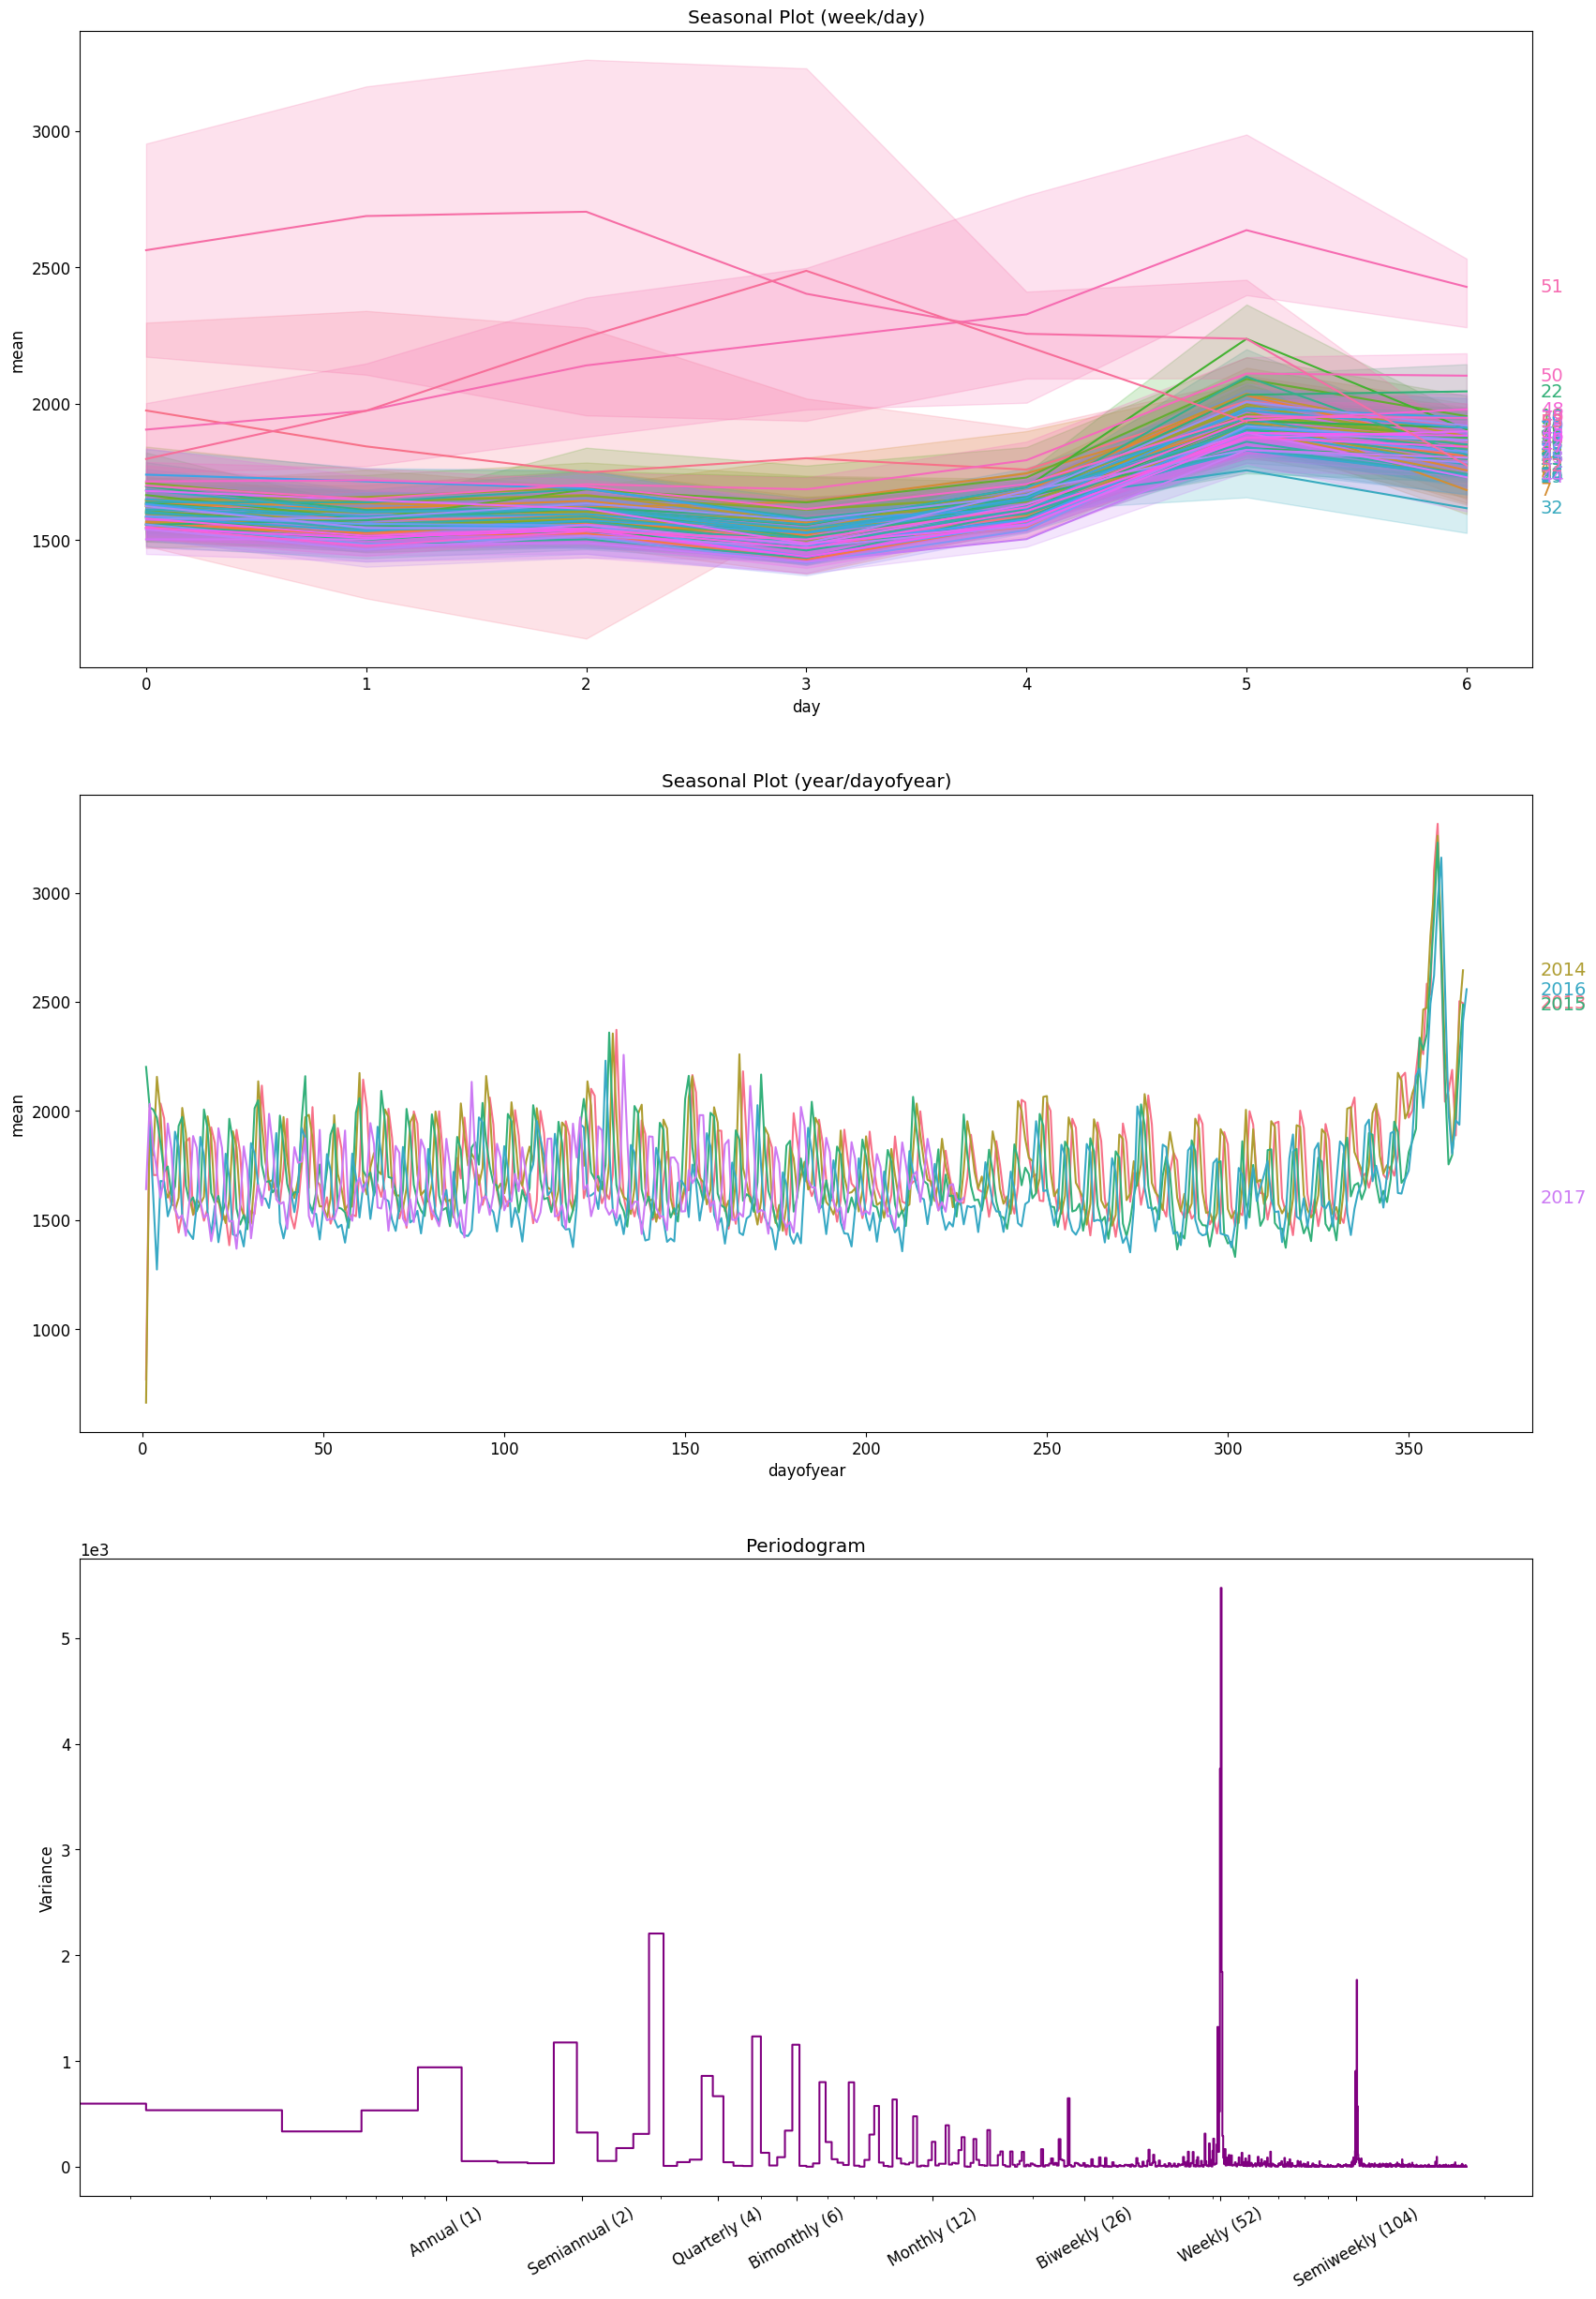

In [101]:
seasonality(df_trans, 'date', 'D', 'transactions')


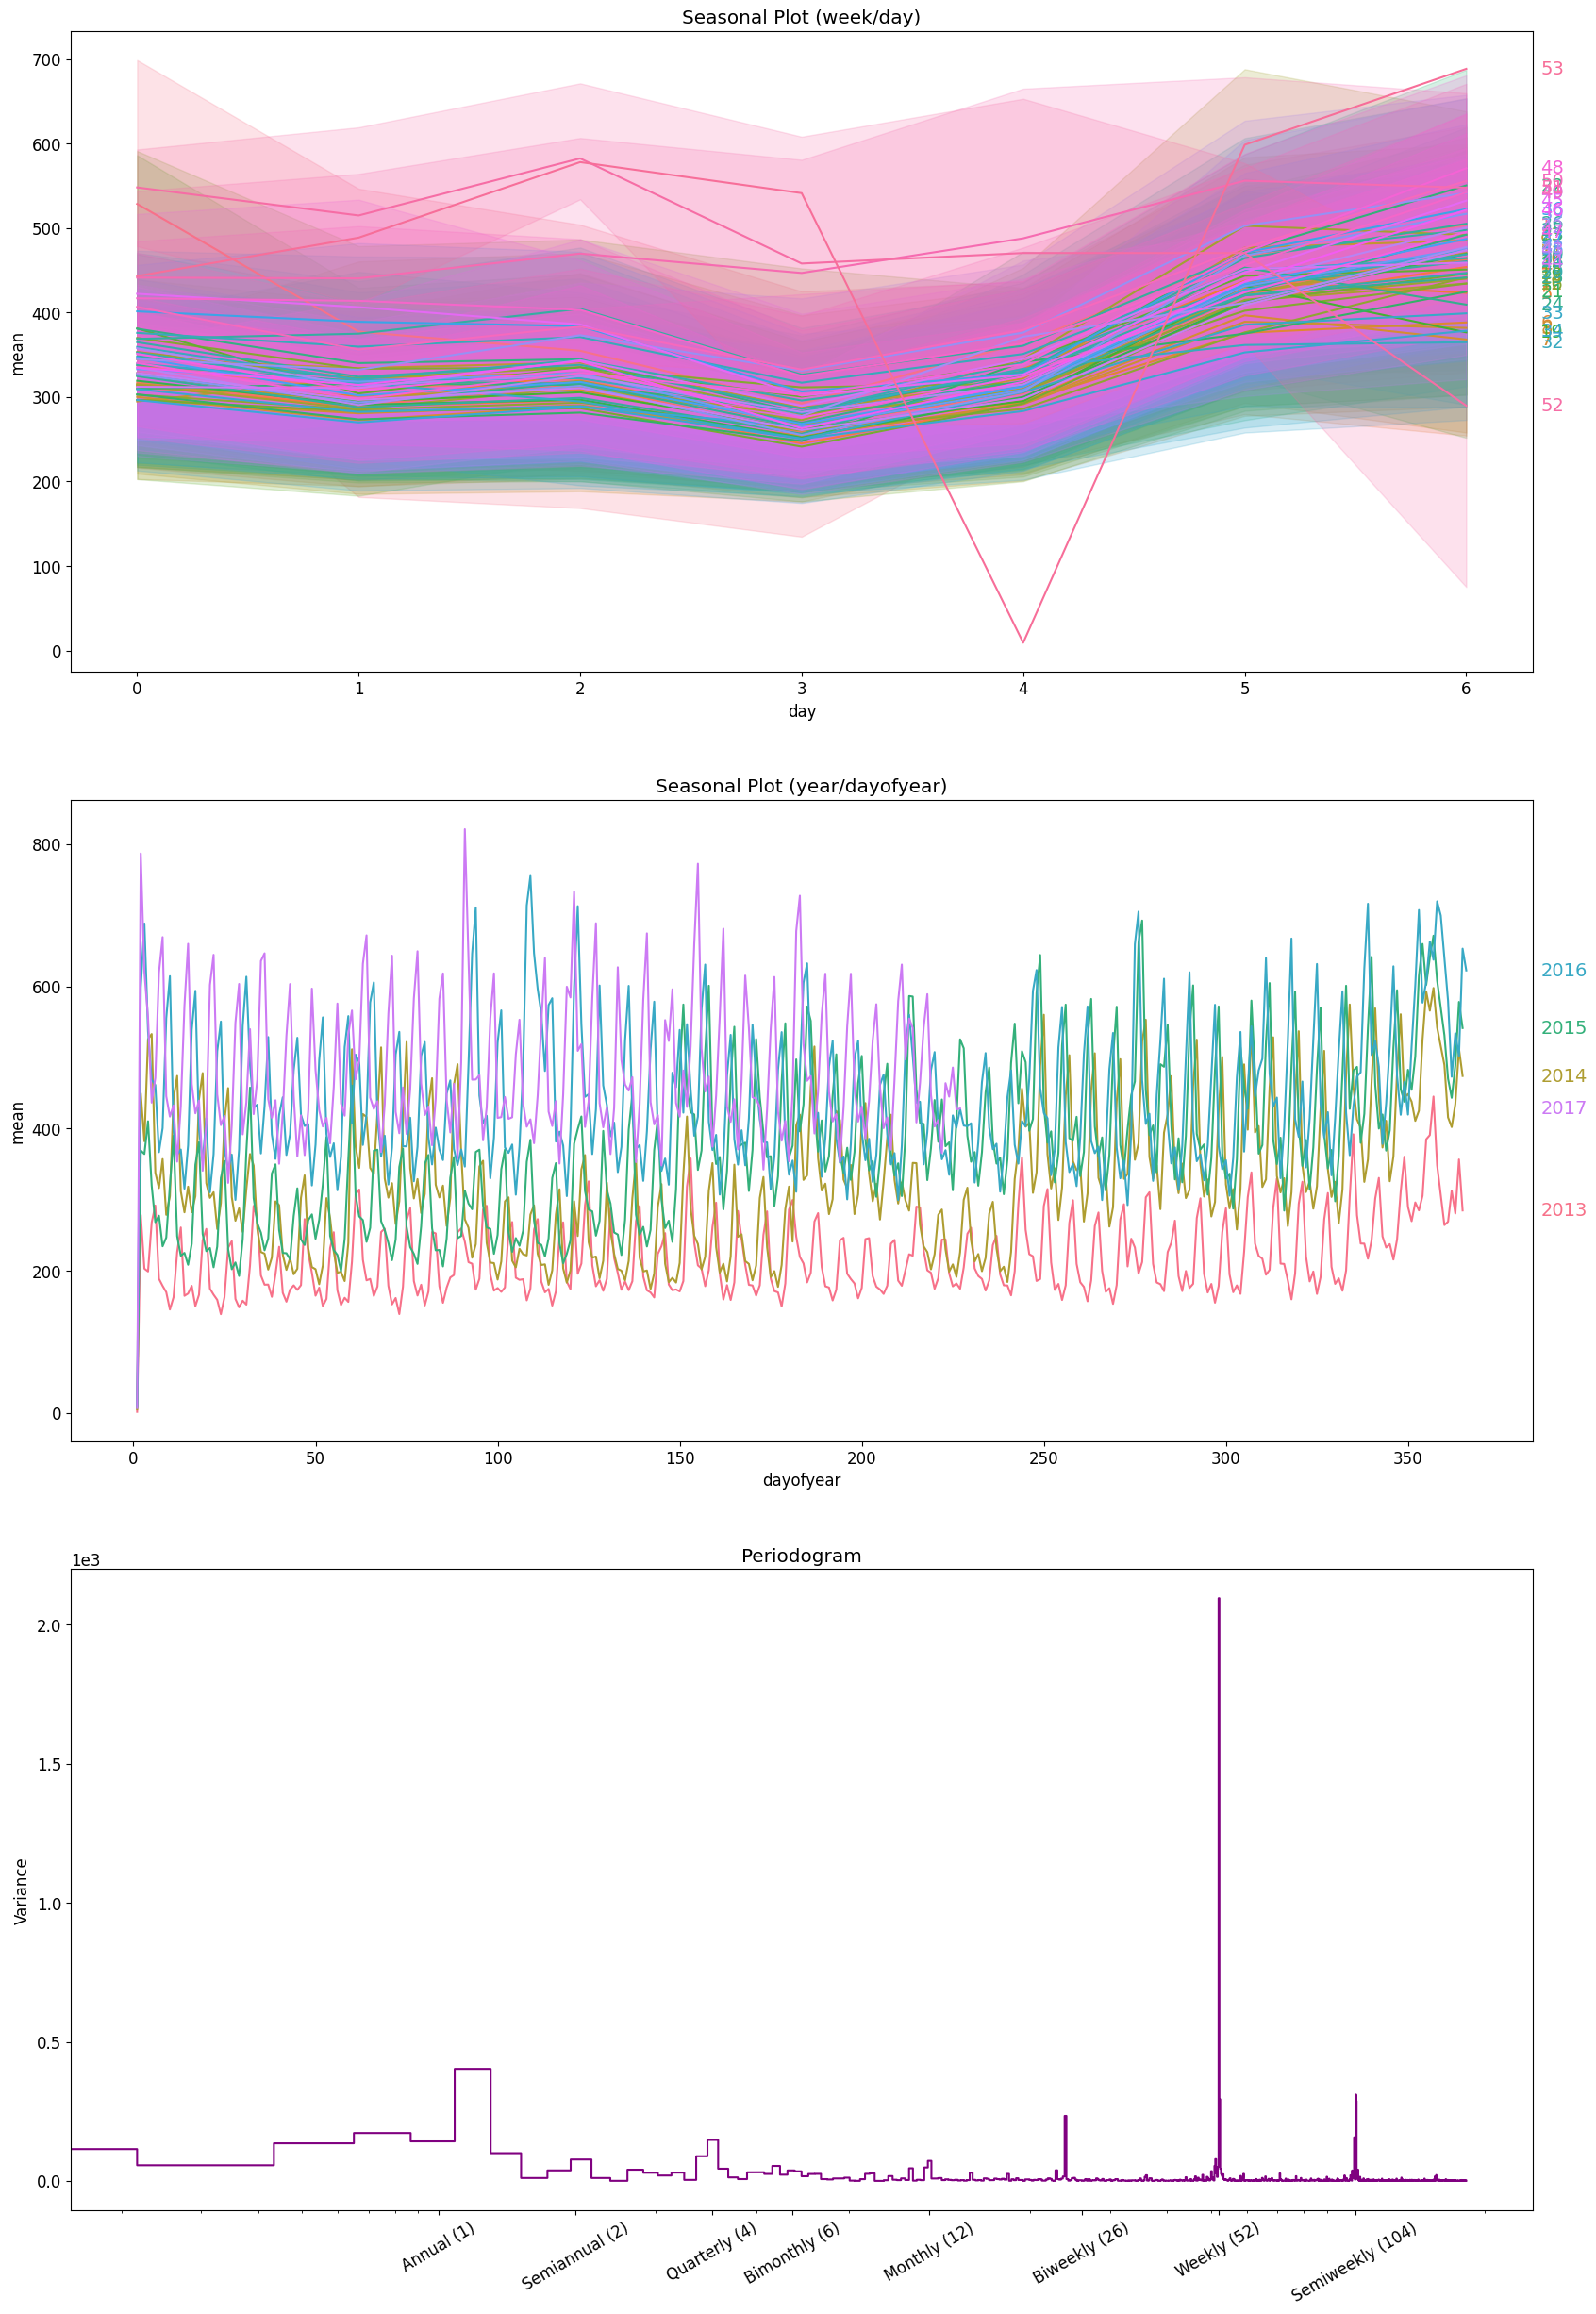

In [103]:
# df_train, grouped by day
seasonality(df_train, 'date', 'D', 'sales')

## ARIMA Modelling

In [1]:
import scipy.stats as stats
from scipy.stats import pearsonr
import itertools
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv(r"C:\Users\Desktop\dataset\train.csv")
test_df = pd.read_csv(r"C:\Users\Desktop\dataset\test.csv")
oil_df = pd.read_csv(r"C:\Users\Desktop\Projects\dataset\oil.csv")
transaction_df = pd.read_csv(r"C:\Users\Desktop\dataset\trn.csv")
stores_df = pd.read_csv(r"C:\Users\Desktop\dataset\stores.csv")
holiday_event_df = pd.read_csv(r"C:\Users\Desktop\dataset\events.csv")

In [3]:
missing_percentages = train_df.isnull().sum()/ len(train_df) * 100 

print(missing_percentages)

id             0.0
date           0.0
store_nbr      0.0
family         0.0
sales          0.0
onpromotion    0.0
dtype: float64


In [4]:
columns_to_delete = missing_percentages[missing_percentages > 30].index

train_df = train_df.drop(columns=columns_to_delete)

In [5]:
train_df = train_df.drop_duplicates()
train_df

id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[3000888 rows x 6 columns]

In [6]:
train_df = train_df.merge(stores_df, on ='store_nbr')
train_df = train_df.merge(oil_df, on ='date', how='left')
holiday_event_df = holiday_event_df.rename(columns={'type': 'holiday_type'})
train_df = train_df.merge(holiday_event_df, on='date', how='left')

In [7]:
grouped_data = train_df.groupby('type')['sales']

f_statistic, p_value = stats.f_oneway(*[grouped_data.get_group(type) for type in grouped_data.groups])

print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 18042.538209333376
p-value: 0.0


'\nBased on the F-statistics and p-value above, we reject null hypothesis and accept alternative hypothesis. \nHence, the type of stores does affect the store sales. There is a significant difference in store sales between \ndifferent type.\n'

In [8]:
correlation, p_value = pearsonr(train_df['onpromotion'], train_df['sales'])

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.42824106651855975
p-value: 0.0


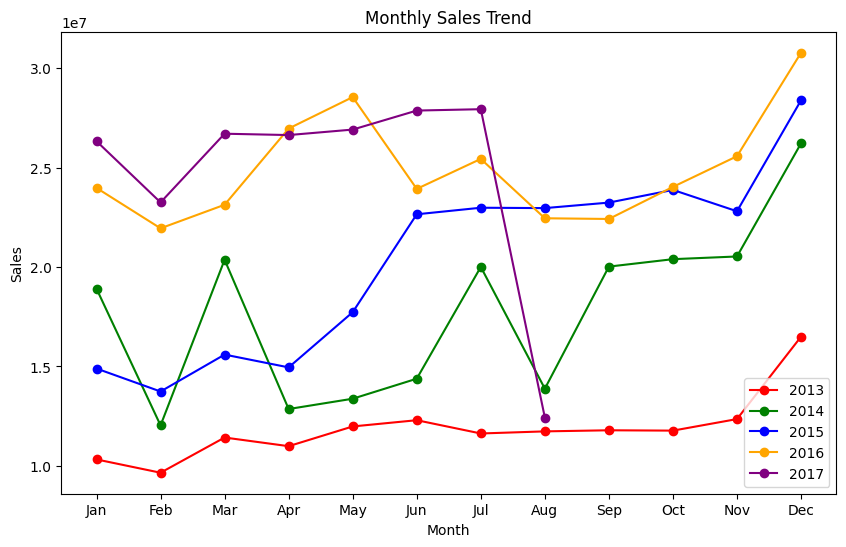

In [10]:
train_df['date']= pd.to_datetime(train_df['date'])


train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year

monthly_sales = train_df.groupby(['month', 'year'])['sales'].sum().reset_index()

plt.figure(figsize=(10, 6))  # Set the figure size

years = monthly_sales['year'].unique()
colors = itertools.cycle(['red', 'green', 'blue', 'orange', 'purple'])

for year in years:
    year_data = monthly_sales[monthly_sales['year'] == year]
    plt.plot(year_data['month'], year_data['sales'], marker='o', color=next(colors), label=str(year))

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)

plt.legend()
plt.show()

In [11]:
train_df['diff_sales'] = train_df['sales'].diff()
train_df = train_df.dropna()
print(train_df['diff_sales'])
train_df['diff_sales'] = train_df['sales'] - train_df['sales'].shift(1)

1353         -9.642
1354          0.000
1355          0.000
1356        172.000
1357       -172.000
             ...   
3054343     432.133
3054344    -283.580
3054345    2265.176
3054346   -2298.729
3054347    -105.000
Name: diff_sales, Length: 322542, dtype: float64


C:\Users\Arin\AppData\Local\Temp\ipykernel_22476\15101308.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['diff_sales'] = train_df['sales'] - train_df['sales'].shift(1)


In [12]:
train_df = train_df.dropna()
print(train_df['diff_sales'])


1354          0.000
1355          0.000
1356        172.000
1357       -172.000
1358         96.248
             ...   
3054343     432.133
3054344    -283.580
3054345    2265.176
3054346   -2298.729
3054347    -105.000
Name: diff_sales, Length: 322541, dtype: float64


In [13]:
ts = train_df['diff_sales']
result = adfuller(ts)

adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -96.53322283468742
p-value: 0.0


In [14]:
result = kpss(ts)
kpss_statistic = result[0]
p_value = result[1]
print("KPSS Statistic:", kpss_statistic)
print("p-value:", p_value)

KPSS Statistic: 0.0016459404641113041
p-value: 0.1


C:\Users\Arin\AppData\Local\Temp\ipykernel_22476\2893815461.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(ts)


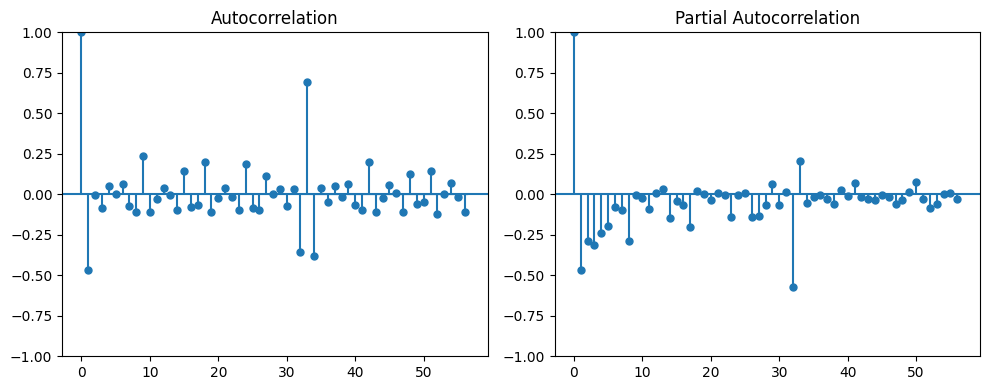

In [15]:
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(121)
plot_acf(train_df['diff_sales'], ax=ax1)

ax2 = plt.subplot(122)
plot_pacf(train_df['diff_sales'], ax=ax2)
plt.tight_layout()
plt.show()
p = 2
d = 1 
q = 1

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=83.732, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=135.614, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=119.887, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=96.885, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=133.661, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=82.793, Time=0.42 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=84.849, Time=0.16 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=81.396, Time=0.62 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=83.229, Time=0.63 sec
 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=83.002, Time=0.60 sec
 ARIMA(2,1,1)(0,0,2)[7] intercept   : AIC=96.638, Time=0.36 sec
 ARIMA(3,1,2)(0,0,2)[7] intercept   : AIC=82.280, Time=0.75 sec
 ARIMA(2,1,3)(0,0,2)[7] intercept   : AIC=81.778, Time=0.77 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=84.922, Time=0.36 sec
 ARIMA(1,1,3)(0,0,2)[7] intercept   : AIC=82.371, Time=0.7

C:\Users\Arin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Arin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         sales_log   No. Observations:                  166
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 7)   Log Likelihood                 -30.356
Date:                           Sat, 09 Aug 2025   AIC                             74.711
Time:                                   14:53:07   BIC                             95.692
Sample:                                        0   HQIC                            83.235
                                           - 166                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5809      0.121     -4.789      0.000      -0.819      -0.343
ar.L2          0.1518      0.119      1.279

C:\Users\Arin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Arin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


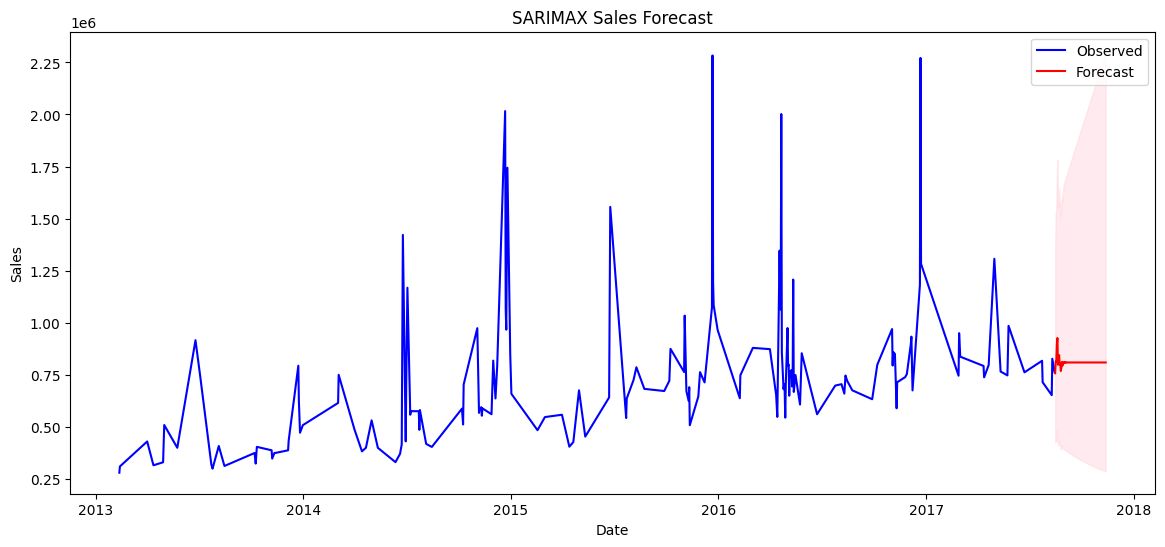

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima import auto_arima

train_df['date'] = pd.to_datetime(train_df['date'])
train_df = train_df.sort_values('date')

daily_sales = train_df.groupby('date')['sales'].sum().reset_index()
daily_sales.set_index('date', inplace=True)
daily_sales['sales_log'] = np.log1p(daily_sales['sales'])
auto_model = auto_arima(
    daily_sales['sales_log'],
    seasonal=True,
    m=7,  # weekly seasonality for daily data
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(auto_model.summary())

order = auto_model.order
seasonal_order = auto_model.seasonal_order

sarimax_model = sm.tsa.statespace.SARIMAX(
    daily_sales['sales_log'],
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarimax_result = sarimax_model.fit(disp=False)
print(sarimax_result.summary())

forecast_steps = 90  # e.g., next 90 days
sarimax_forecast = sarimax_result.get_forecast(steps=forecast_steps)

forecast_mean_log = sarimax_forecast.predicted_mean
forecast_ci_log = sarimax_forecast.conf_int()

forecast_mean = np.expm1(forecast_mean_log)
forecast_ci = np.expm1(forecast_ci_log)

plt.figure(figsize=(14, 6))
plt.plot(daily_sales.index, daily_sales['sales'], label='Observed', color='blue')
forecast_index = pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.title('SARIMAX Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [132]:
# Make predictions
start_idx = len(train_np)
end_idx = len(train_np) + len(test_df) - 1
predictions = result.predict(start=start_idx, end=end_idx)

print(predictions)

[ 7.24452104e+02 -4.07495518e+02  3.78783409e+01 ...  1.28640729e-03
  1.28640729e-03  1.28640729e-03]


In [133]:
actual_values = train_df['diff_sales']

In [13]:
df_trainm.fillna({
    'holid_type': 'Work Day',
    'transactions' : 0,
    'locale'       : 'No Holiday'
}, inplace=True)

df_trainm['dcoilwtico'] = df_trainm['dcoilwtico'].interpolate(method='linear', limit_direction='both')

In [17]:
df_trainm['date'] = pd.to_datetime(df_trainm['date'])

df_trainm['year'] = df_trainm['date'].dt.year
df_trainm['month'] = df_trainm['date'].dt.month
df_trainm['day_of_week'] = df_trainm['date'].dt.dayofweek
df_trainm['is_weekend'] = df_trainm['day_of_week'].isin([5, 6]).astype(int)

In [20]:
group_cols = ['store_nbr', 'family']
g = df_trainm.groupby(group_cols)['sales']

df_trainm['lag_1']        = g.transform(lambda x: x.shift(1))
df_trainm['roll_mean_7']  = g.transform(lambda x: x.shift(1).rolling(window=7).mean())
df_trainm['roll_std_7']   = g.transform(lambda x: x.shift(1).rolling(window=7).std())

df_trainm = df_trainm.dropna(subset=['lag_1', 'roll_mean_7', 'roll_std_7']) \
           .reset_index(drop=True)

print("After lag/rolling feature creation, data shape:", df_trainm.shape)

After lag/rolling feature creation, data shape: (3029400, 25)


In [24]:
data = df_trainm

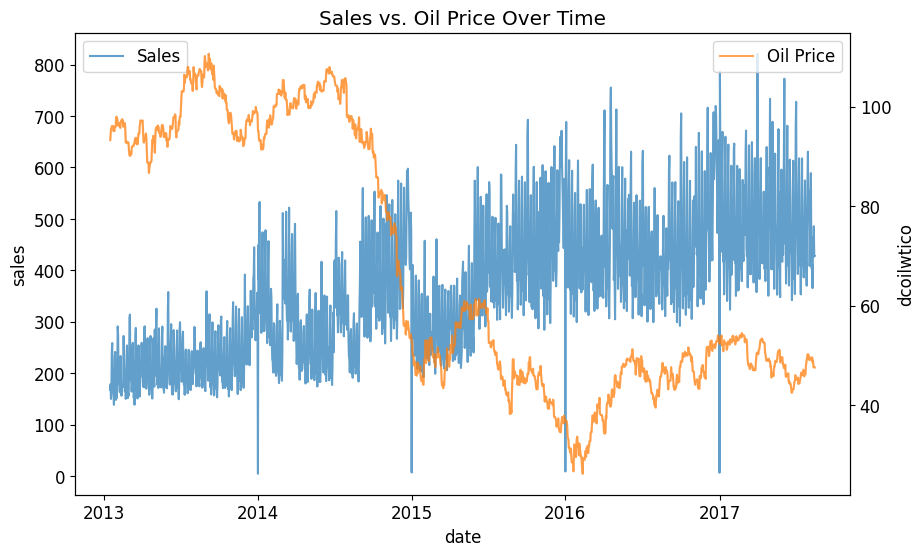

In [25]:
sns.lineplot(data=data, x='date', y='sales', color='tab:blue', label='Sales', alpha=0.7, errorbar=None)
ax2 = plt.gca().twinx() 
sns.lineplot(data=data, x='date', y='dcoilwtico', color='tab:orange', label='Oil Price', alpha=0.7, ax=ax2)
plt.title('Sales vs. Oil Price Over Time')
plt.show()

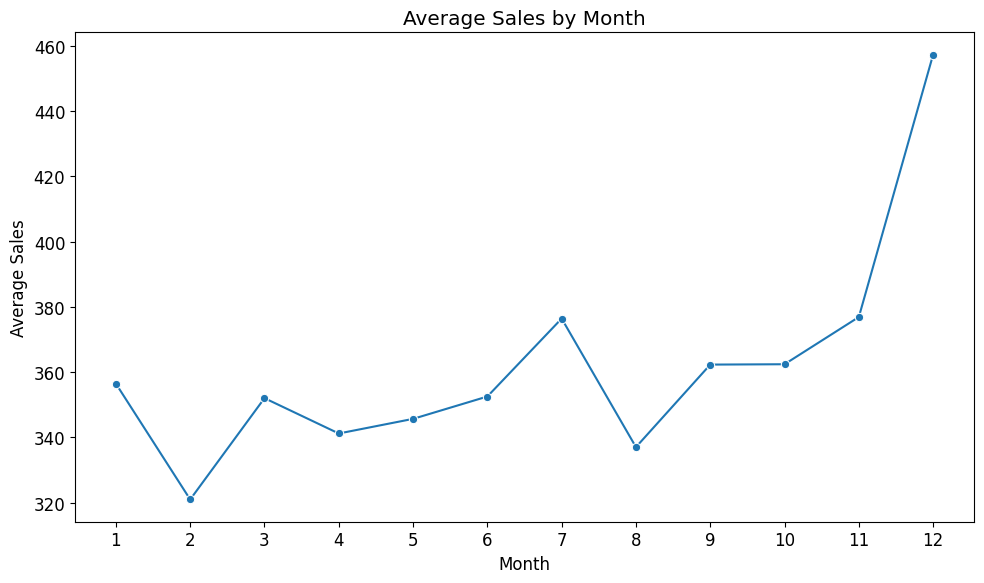

In [26]:
monthly_avg = data.groupby('month')['sales'].mean().reset_index()

sns.lineplot(x='month', y='sales', data=monthly_avg, marker='o', color='tab:blue')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales by Month')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

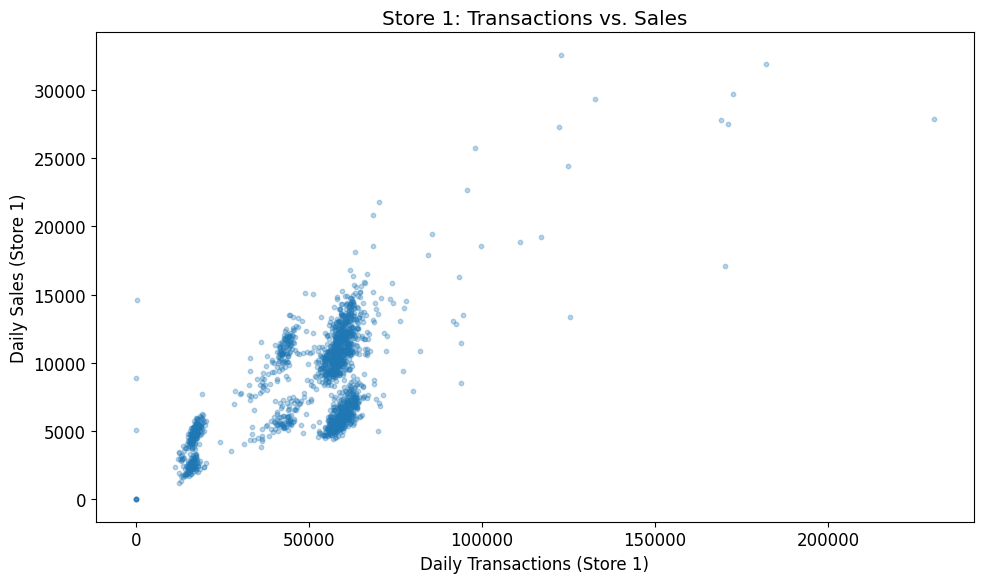

In [28]:
store_id = 1
store_sales = data[data['store_nbr'] == store_id].groupby('date')['sales'].sum().reset_index()
store_trans = data[data['store_nbr'] == store_id].groupby('date')['transactions'].sum().reset_index()

store_merged = store_sales.merge(store_trans, on='date', how='left').fillna(0)

plt.scatter(store_merged['transactions'], store_merged['sales'], alpha=0.3, s=10)
plt.xlabel(f'Daily Transactions (Store {store_id})')
plt.ylabel(f'Daily Sales (Store {store_id})')
plt.title(f'Store {store_id}: Transactions vs. Sales')
plt.tight_layout()
plt.show()


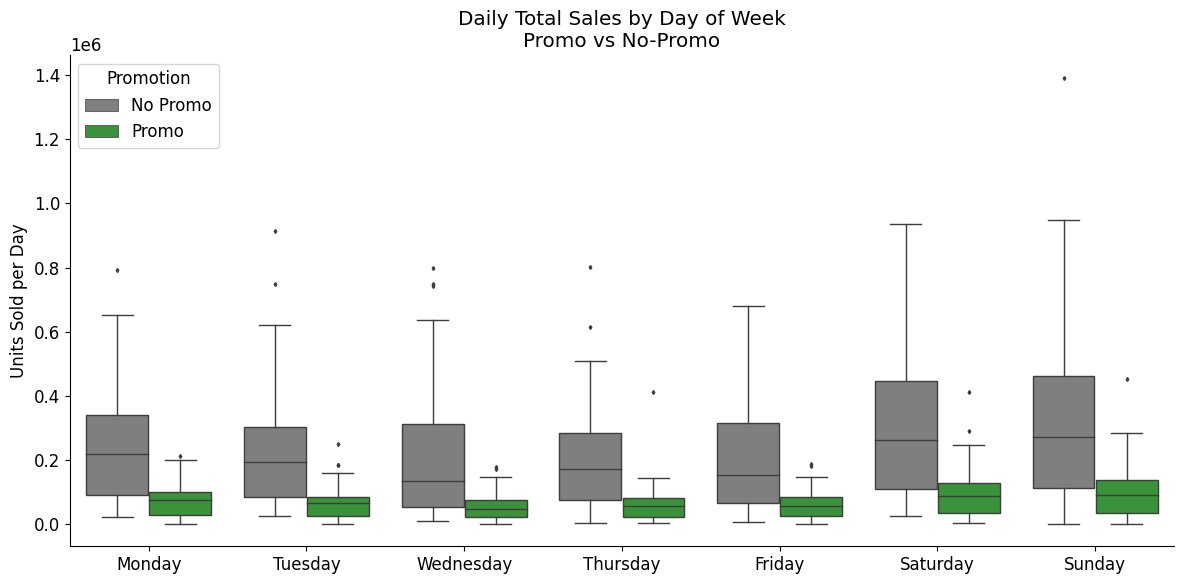

In [29]:
daily_promo = (
    data
    .groupby(['date','onpromotion'])['sales']
    .sum()
    .reset_index()
    .rename(columns={'onpromotion':'promo_flag'})
)
daily_promo['day_name'] = daily_promo['date'].dt.day_name()
daily_promo['promo_flag'] = daily_promo['promo_flag'].map({0:'No Promo', 1:'Promo'})

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
palette = {'No Promo':'tab:gray','Promo':'tab:green'}

plt.figure(figsize=(12,6))
sns.boxplot(
    data=daily_promo,
    x='day_name', y='sales', hue='promo_flag',
    order=order, palette=palette,
    fliersize=2,     
    linewidth=1
)

plt.title('Daily Total Sales by Day of Week\nPromo vs No-Promo')
plt.xlabel('')
plt.ylabel('Units Sold per Day')
plt.legend(title='Promotion', loc='upper left')
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

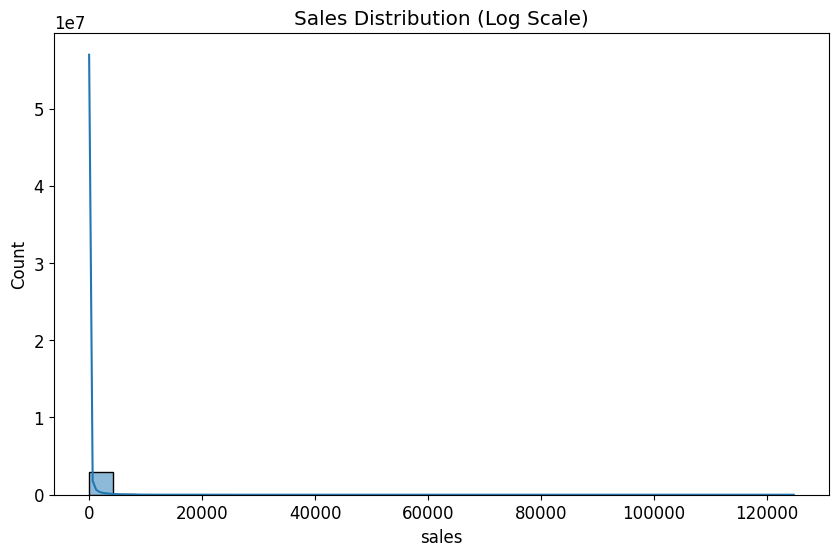

In [30]:
sns.histplot(data=data, x='sales', bins=30, kde=True)
plt.title('Sales Distribution (Log Scale)')
plt.show()

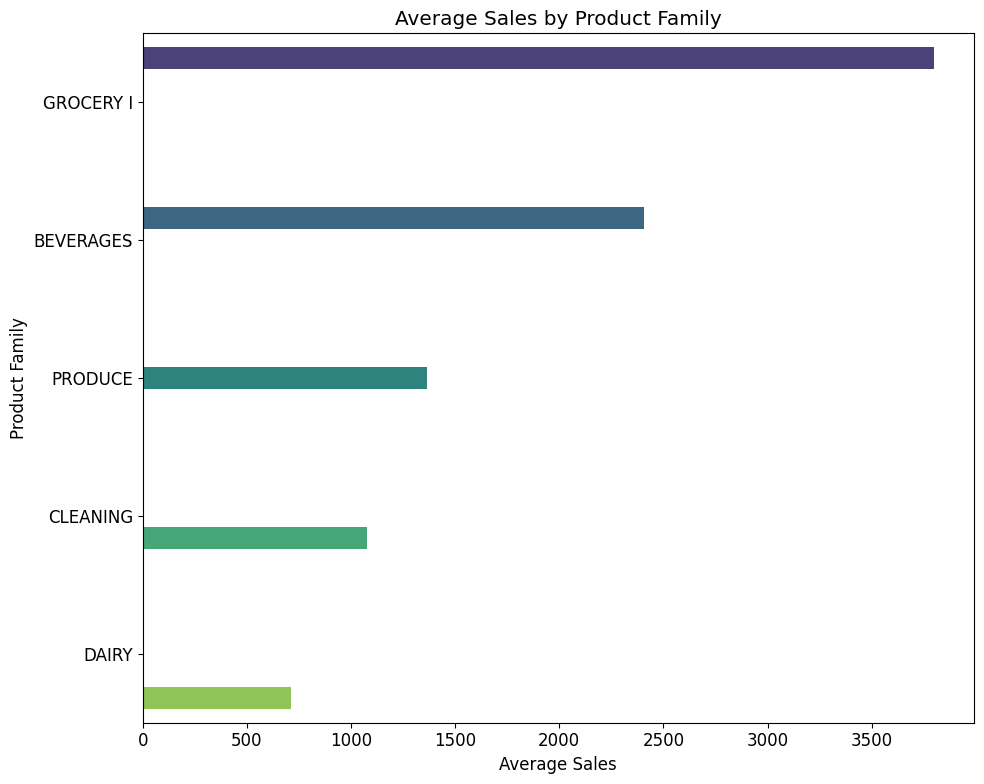

In [31]:
avg_sales_family = data.groupby('family')['sales'].mean().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(
    data=avg_sales_family,
    x='sales',
    y='family',
    hue='family',
    palette='viridis'
)
plt.gca().legend_.remove() 
plt.title('Average Sales by Product Family')
plt.xlabel('Average Sales')
plt.ylabel('Product Family')
plt.tight_layout()
plt.show()

In [34]:
data['is_holiday'] = data['holid_type'].notnull().astype(int)

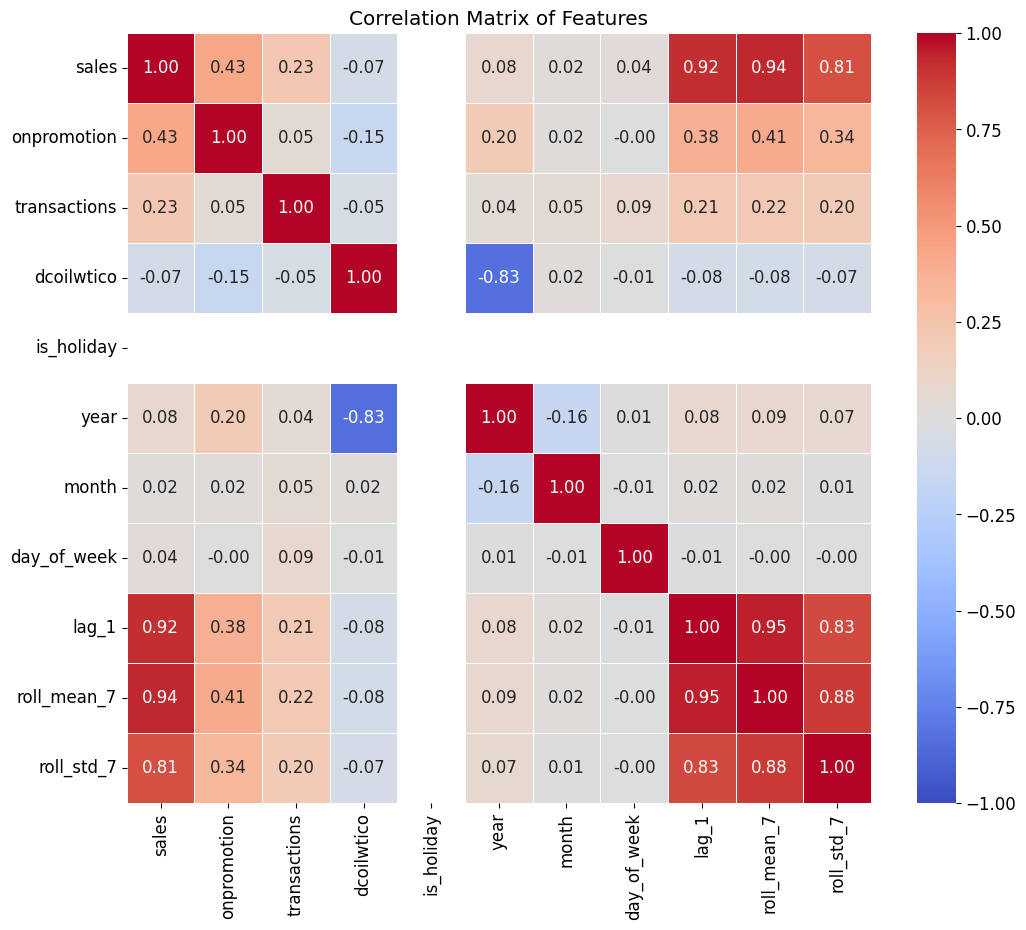

In [35]:
corr_cols = [
    'sales', 'onpromotion', 'transactions', 'dcoilwtico', 'is_holiday',
    'year', 'month', 'day_of_week',
    'lag_1', 'roll_mean_7', 'roll_std_7'
]
corr_matrix = data[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title('Correlation Matrix of Features')
plt.show()

In [36]:
to_drop = ['id', 'date', 'is_weekend']
data = data.drop(columns=to_drop)
data.select_dtypes(include='object').columns

Index(['family', 'city', 'state', 'store_type', 'holid_type', 'locale',
       'locale_name', 'description'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
label_enc = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label_enc.fit_transform(data[col].astype(str))

data.head()

Unnamed: 0  store_nbr  family   sales  onpromotion  transactions  city  \
0       24948          1       0     1.0            0        1680.0    18   
1       24949          1       1     0.0            0        1680.0    18   
2       24950          1       2     0.0            0        1680.0    18   
3       24951          1       3  1149.0            0        1680.0    18   
4       24952          1       4     0.0            0        1680.0    18   

   state  store_type  cluster  ...  locale_name  description  transferred  \
0     12           3       13  ...           24           99        False   
1     12           3       13  ...           24           99        False   
2     12           3       13  ...           24           99        False   
3     12           3       13  ...           24           99        False   
4     12           3       13  ...           24           99        False   

   year  month  day_of_week   lag_1  roll_mean_7  roll_std_7  is_holiday  
0  2013      1            1     2.0     2.142857    0.377964           1  
1  2013      1            1     0.0     0.000000    0.000000           1  
2  2013      1            1     2.0     1.571429    1.272418           1  
3  2013      1            1  1178.0   998.285714  221.822537           1  
4  2013      1            1     0.0     0.000000    0.000000           1  

[5 rows x 23 columns]

In [39]:
sample_frac = 0.10   
data_sample = data.sample(frac=sample_frac, random_state=42).reset_index(drop=True)
print("Sampled data shape:", data_sample.shape)

Sampled data shape: (302940, 23)


In [40]:
X = data_sample.drop('sales', axis=1)
y = data_sample['sales']


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [44]:
scaler_features = StandardScaler()
X_train = scaler_features.fit_transform(X_train)
X_test = scaler_features.transform(X_test)
X_val = scaler_features.transform(X_val)

In [46]:
from sklearn.model_selection import (TimeSeriesSplit, RandomizedSearchCV)
tscv = TimeSeriesSplit(n_splits=3)

In [49]:
xgb = XGBRegressor(eval_metric='mae', random_state=42)

xgb_param_dist = {
    'n_estimators':       [100, 200],
    'max_depth':          [3, 5],
    'learning_rate':      [0.05, 0.1],
    'subsample':          [0.8],
    'colsample_bytree':   [0.8],
    'reg_lambda':         [0.5, 1.0, 2.0]
}

rand_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_dist,
    n_iter=20,                           # only 20 random combinations
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1,
    error_score='raise'
)

rand_xgb.fit(X_train, y_train)

# Best parameters
print("\nBest XGBoost Parameters:")
print(rand_xgb.best_params_)

# Best model
best_xgb = rand_xgb.best_estimator_


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best XGBoost Parameters:
{'subsample': 0.8, 'reg_lambda': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [50]:
rf = RandomForestRegressor(random_state=42)

rf_param_dist = {
    'n_estimators':       [100],
    'max_depth':          [3, 5],
    'min_samples_split':  [20, 50],
    'min_samples_leaf':   [10, 20]
}

rand_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_dist,
    n_iter=3,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=1,
    error_score='raise'
)

rand_rf.fit(X_train, y_train)


print("\nBest Random Forest Parameters:")
print(rand_rf.best_params_)

best_rf = rand_rf.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits

Best Random Forest Parameters:
{'n_estimators': 100, 'min_samples_split': 50, 'min_samples_leaf': 10, 'max_depth': 5}


In [51]:
splits = {
    "Train":     (X_train, y_train),
    "Validation":(X_val,   y_val),
    "Test":      (X_test,  y_test),
}
models = {
    "XGBoost":     best_xgb,
    "RandomForest":best_rf,
}

records = []
for split_name, (X, y_true) in splits.items():
    for model_name, model in models.items():
        y_pred = model.predict(X)
        records.append({
            "Model":  model_name,
            "Split":  split_name,
            "MAE":    mean_absolute_error(y_true, y_pred),
            "MSE":    mean_squared_error(y_true, y_pred),
            "R2":     r2_score(y_true, y_pred),
        })

df = pd.DataFrame(records)

print("\nModel Performance Summary:")
table = (
    df
      .melt(
         id_vars=["Model","Split"],
         value_vars=["MAE","MSE","R2"],
         var_name="Metric",
         value_name="Score"
      )
      .pivot(index="Metric", columns=["Model","Split"], values="Score")
      .round(2)
)
print(table)


Model Performance Summary:
Model    XGBoost RandomForest    XGBoost RandomForest   XGBoost RandomForest
Split      Train        Train Validation   Validation      Test         Test
Metric                                                                      
MAE        51.03        73.81      58.25        75.72     56.72        74.49
MSE     27794.89     89351.27  292430.43    313944.52  45395.51     80119.08
R2          0.98         0.93       0.81         0.79      0.96         0.93


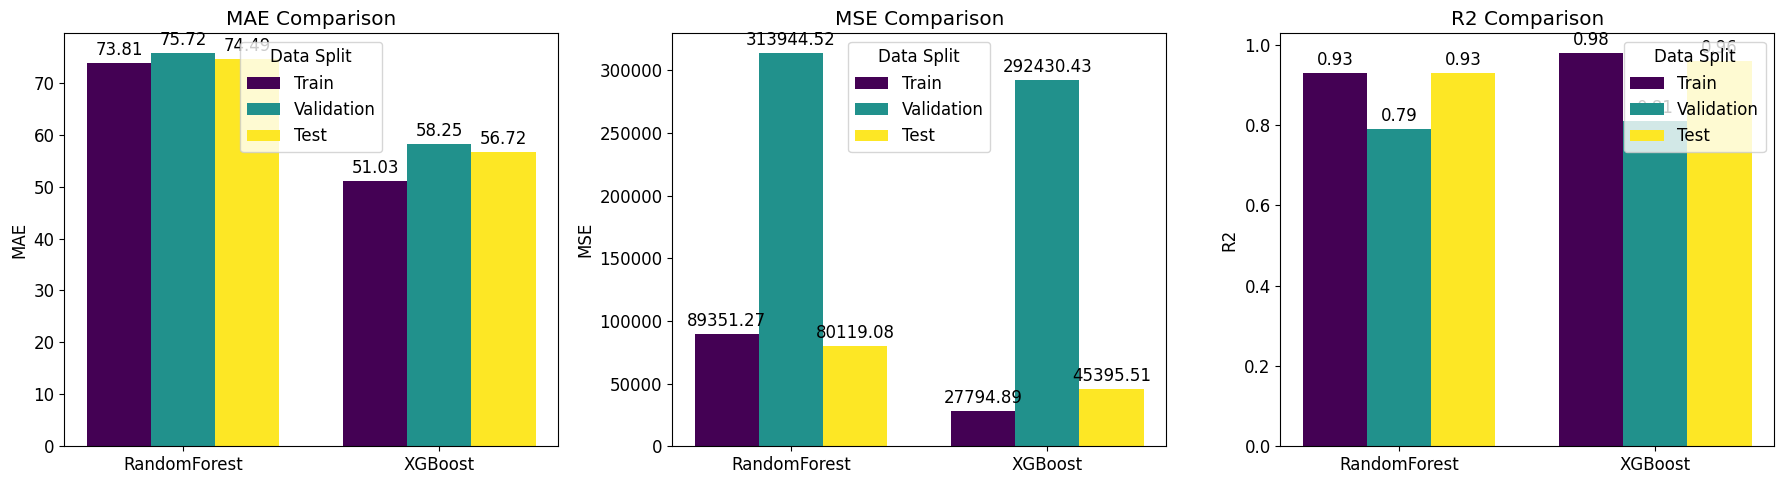

In [52]:
metrics = ["MAE", "MSE", "R2"]
splits_order = ["Train", "Validation", "Test"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)
cmap = plt.get_cmap("viridis")
n = len(splits_order)
colors = [cmap(i/(n-1)) for i in range(n)]

for ax, metric in zip(axes, metrics):
    dfm = table.loc[metric].unstack(level=1).reindex(columns=splits_order)
    x = np.arange(len(dfm.index))
    width = 0.25

    for i, split in enumerate(splits_order):
        bars = ax.bar(x + i*width, dfm[split], width,
                      label=split, color=colors[i])
        ax.bar_label(bars, padding=3, fmt="%.2f")

    ax.set_xticks(x + width, dfm.index)
    ax.set_title(f"{metric} Comparison")
    ax.set_ylabel(metric)
    ax.legend(title="Data Split")

fig.tight_layout()
plt.show()


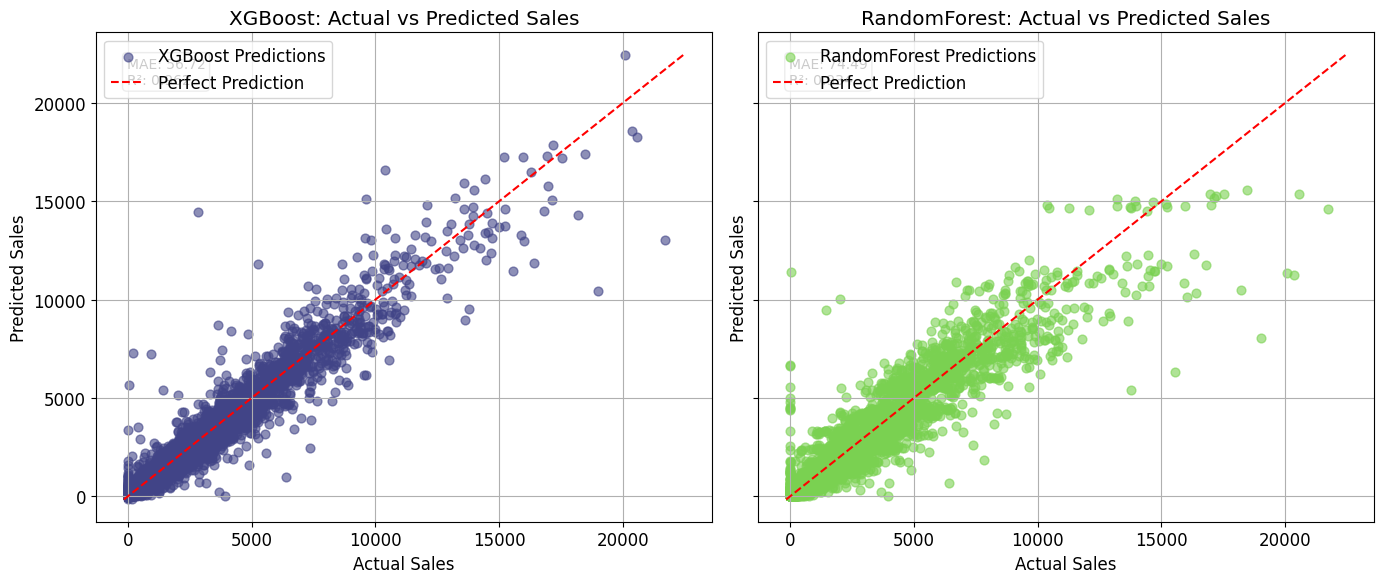

In [53]:
X_test_data, y_test_data = X_test, y_test  
models = {
    "XGBoost":      best_xgb,
    "RandomForest": best_rf,
}
preds = {name: model.predict(X_test_data) for name, model in models.items()}

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
cmap = plt.get_cmap("viridis")
colors = [cmap(0.2), cmap(0.8)]  # pick two distinct viridis colors

all_actual = y_test_data
all_predicted = np.concatenate(list(preds.values()))
mn = min(all_actual.min(), all_predicted.min())
mx = max(all_actual.max(), all_predicted.max())

for ax, (name, y_pred), color in zip(axes, preds.items(), colors):
    ax.scatter(y_test_data, y_pred, alpha=0.6, s=40, color=color, label=f"{name} Predictions")
    ax.plot([mn, mx], [mn, mx], linestyle="--", color="red", label="Perfect Prediction")
    mae = mean_absolute_error(y_test_data, y_pred)
    r2  = r2_score(y_test_data, y_pred)
    text = f"MAE: {mae:.2f}\nR²: {r2:.3f}"
    ax.text(
        0.05, 0.95, text,
        transform=ax.transAxes,
        fontsize=10,
        va="top",
        bbox=dict(facecolor="white", edgecolor="gray", alpha=0.7, boxstyle="round")
    )

    ax.set_title(f"{name}: Actual vs Predicted Sales")
    ax.set_xlabel("Actual Sales")
    ax.set_ylabel("Predicted Sales")
    ax.grid(True)
    ax.legend()

fig.tight_layout()
plt.show()

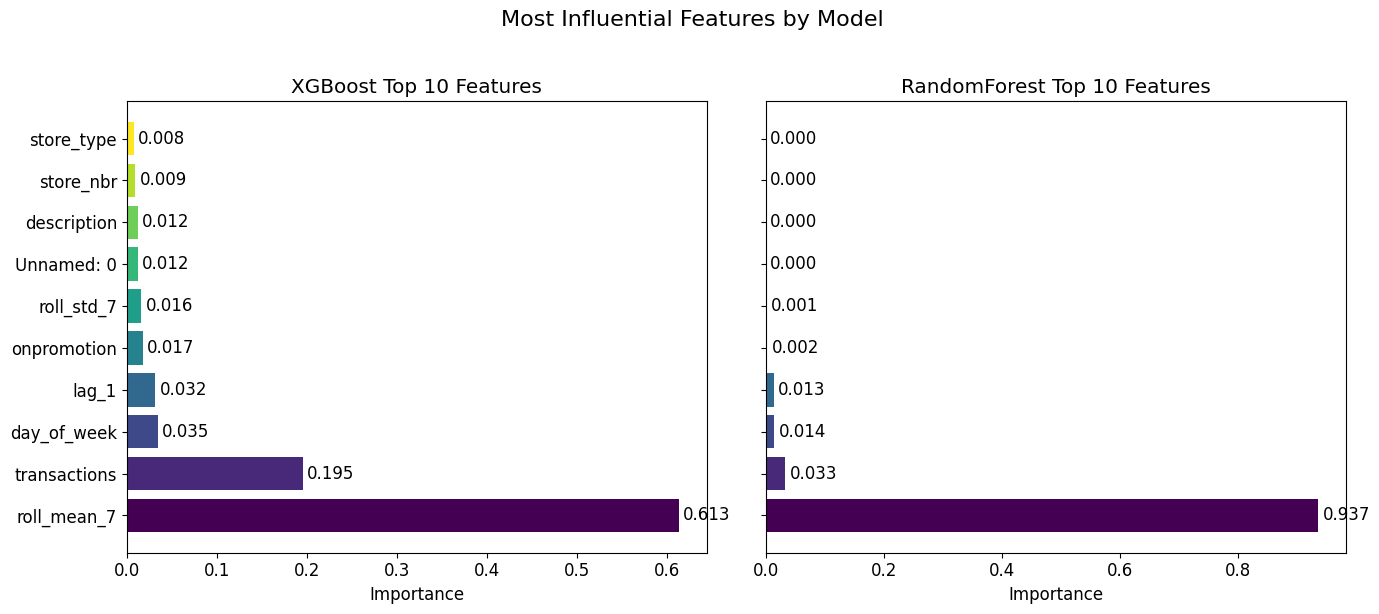

In [54]:
feature_names = [c for c in data_sample.columns if c != "sales"]

models = {
    "XGBoost":      best_xgb,
    "RandomForest": best_rf,
}
top_n = 10

imps = {}
for name, model in models.items():
    vals   = model.feature_importances_
    series = pd.Series(vals, index=feature_names)
    imps[name] = series.sort_values(ascending=False).head(top_n)

fig, axes = plt.subplots(1, len(models), figsize=(14, 6), sharey=True)
cmap   = plt.get_cmap("viridis")
colors = [cmap(i/(top_n-1)) for i in range(top_n)]

for ax, (name, imp_series) in zip(axes, imps.items()):
    y_pos = np.arange(len(imp_series))
    bars  = ax.barh(y_pos, imp_series.values, color=colors)

    ax.bar_label(bars, fmt="%.3f", padding=3)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(imp_series.index)
    ax.invert_yaxis()

    ax.set_title(f"{name} Top {top_n} Features")
    ax.set_xlabel("Importance")

fig.suptitle("Most Influential Features by Model", fontsize=16, y=1.02)
fig.tight_layout()
plt.show()